In [290]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore')

# PCA

In [352]:
df = pd.read_excel('PCA+India+Data_Census.xlsx')

In [5]:
df.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [6]:
df.tail()

State Code  Dist.Code                     State                Area Name  \
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[5 rows x 61 columns]

In [7]:
df.shape

(640, 61)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [355]:
df.describe().T

count           mean            std    min       25%      50%  \
State Code      640.0      17.114062       9.426486    1.0      9.00     18.0   
Dist.Code       640.0     320.500000     184.896367    1.0    160.75    320.5   
No_HH           640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M           640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F           640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
M_06            640.0   12309.098438   11500.906881   56.0   4733.75   9159.0   
F_06            640.0   11942.300000   11326.294567   56.0   4672.25   8663.0   
M_SC            640.0   13820.946875   14426.373130    0.0   3466.25   9591.5   
F_SC            640.0   20778.392188   21727.887713    0.0   5603.25  13709.0   
M_ST            640.0    6191.807813    9912.668948    0.0    293.75   2333.5   
F_ST            640.0   10155.640625   15875.701488    0.0    429.50   3834.5   
M_LIT           640.0   57967.979688   55910.282466  286.0  21298.00  42693.5   
F_LIT           640.0   66359.565625   75037.860207  371.0  20932.00  43796.5   
M_ILL           640.0   21972.596875   19825.605268  105.0   8590.00  15767.5   
F_ILL           640.0   56012.518750   47116.693769  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.407813   36419.537491  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.760938   37192.360943  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.446875   31480.915680   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.846875   29998.262689  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.342188    4739.161969    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.042188    5326.362728    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.109375    6399.507966    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8925.995312   12864.287584    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.893750    1278.642345    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.773438    3179.414449    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.101562   26068.480886   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.035938   18972.202369  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.960938    7410.791691   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.914062   10996.474528  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.737500    1311.546847    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.682813    3564.626095    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.326562    3781.555707    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.281250    6773.876298    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.742188     462.661891    0.0     71.75    166.0   
MARG_HH_F       640.0     786.626562    1198.718213    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.154687    3609.391821    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.323438    4115.191314   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.168750   39045.316918  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.323438   82970.406216  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.987500    6019.806644   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.864063    8467.473429   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.848438     905.639279    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.584375    2496.541514    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.635938    3059.586387    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.850000    5335.640960    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.362500     358.728567    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.884375     900.025817    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.140625    3036.964381    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.545312    3327.83

In [9]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n" + "-"*50 + "\n")

Column: State Code
State Code
9     71
23    50
10    38
27    35
8     33
33    32
29    30
21    30
18    27
24    26
20    24
28    23
1     22
6     21
3     20
19    19
22    18
12    16
32    14
5     13
2     12
13    11
14     9
7      9
15     8
17     7
16     4
11     4
34     4
35     3
30     2
25     2
31     1
4      1
26     1
Name: count, dtype: int64

--------------------------------------------------

Column: Dist.Code
Dist.Code
1      1
2      1
423    1
424    1
425    1
      ..
215    1
216    1
217    1
218    1
640    1
Name: count, Length: 640, dtype: int64

--------------------------------------------------

Column: State
State
Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                  

In [11]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [12]:
df.duplicated().sum()

0

In [ ]:
# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Get the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Convert the upper triangle to a list and sort in descending order
sorted_corr_list = upper_triangle.unstack().sort_values(ascending=False).dropna()

# Print the sorted correlation list
for (col1, col2), correlation in sorted_corr_list.items():
    print(f"{col1} and {col2}: {correlation:.2f}")


 ## 1. Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

# What is the distribution of the number of households (No_HH) in the dataset?

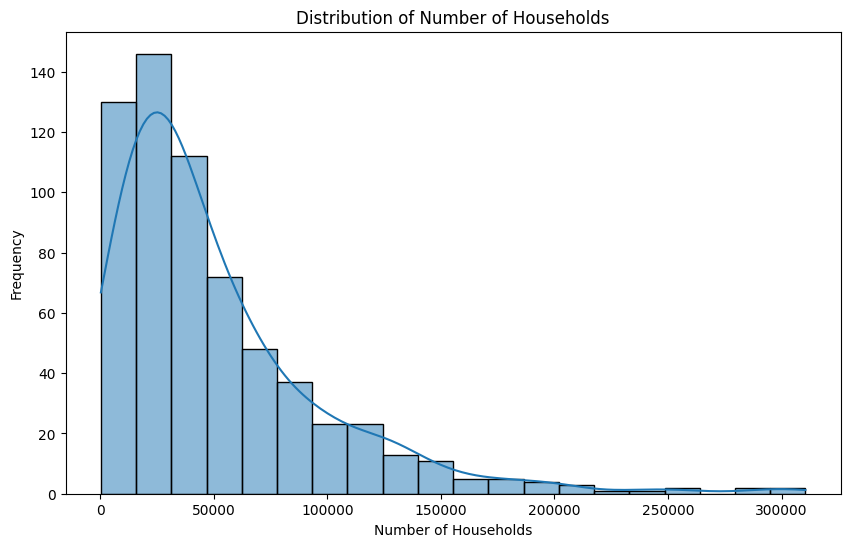

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['No_HH'], bins=20, kde=True)
plt.title('Distribution of Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Frequency')
plt.show()


# How does the total population vary between males and females?

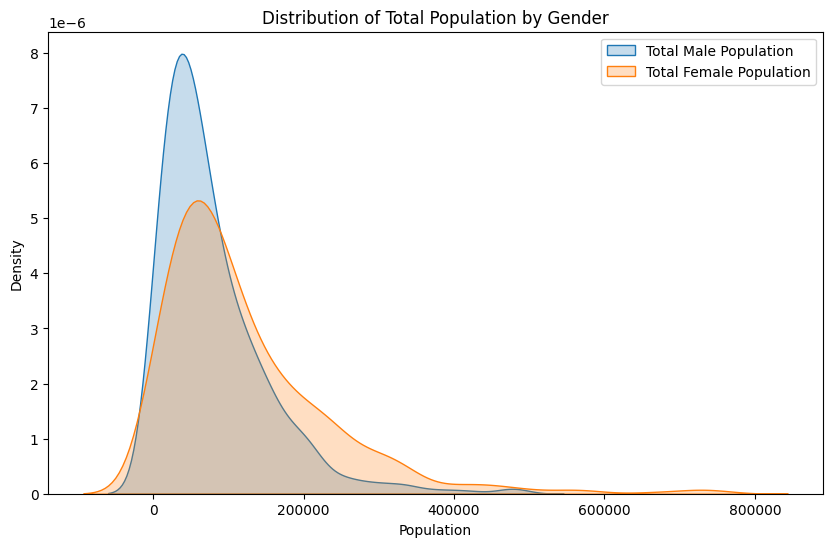

In [23]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['TOT_M'], label='Total Male Population', shade=True)
sns.kdeplot(df['TOT_F'], label='Total Female Population', shade=True)
plt.title('Distribution of Total Population by Gender')
plt.xlabel('Population')
plt.ylabel('Density')
plt.legend()
plt.show()


# What is the age distribution for males and females between age distribution of 0-6 in the dataset?

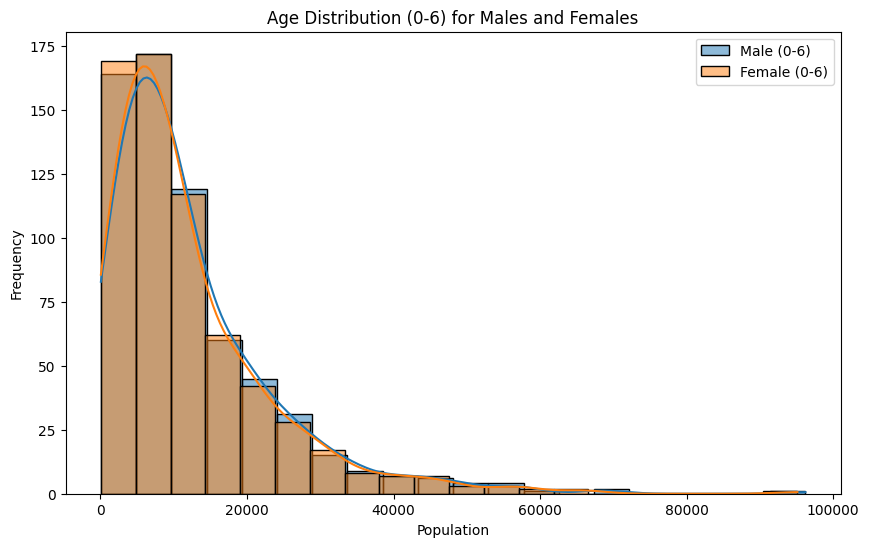

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['M_06'], bins=20, kde=True, label='Male (0-6)')
sns.histplot(df['F_06'], bins=20, kde=True, label='Female (0-6)')
plt.title('Age Distribution (0-6) for Males and Females')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# What is the ratio of the population in the age group 0-6 for males and females?

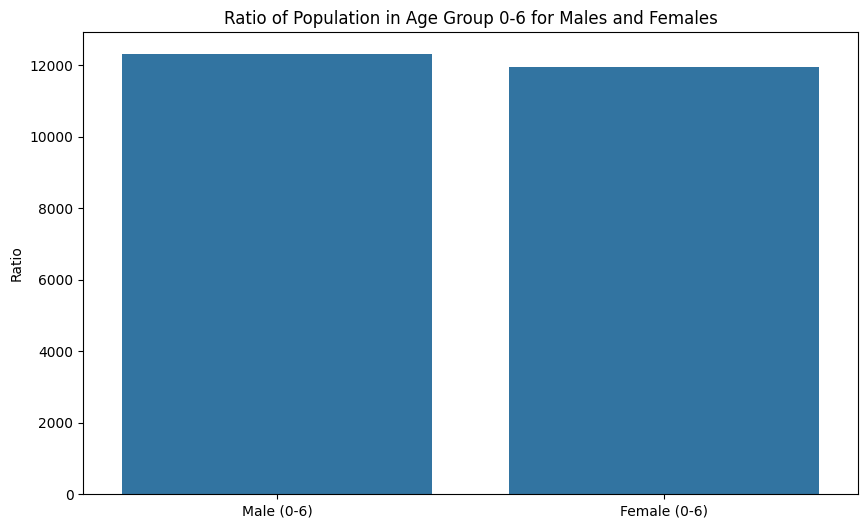

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['Male (0-6)', 'Female (0-6)'], y=[df['M_06'].mean(), df['F_06'].mean()])
plt.title('Ratio of Population in Age Group 0-6 for Males and Females')
plt.ylabel('Ratio')
plt.show()


# What is the proportion of males and females in the total population?

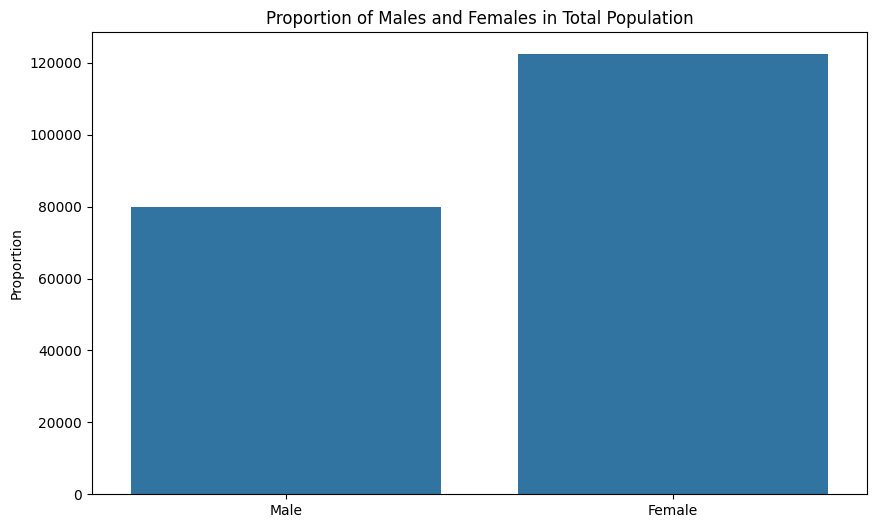

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['Male', 'Female'], y=[df['TOT_M'].mean(), df['TOT_F'].mean()])
plt.title('Proportion of Males and Females in Total Population')
plt.ylabel('Proportion')
plt.show()


# Which state has the highest gender ratio, and which has the lowest?

In [28]:
gender_ratio = df['TOT_F'] / df['TOT_M']
highest_gender_ratio_state = df.loc[gender_ratio.idxmax(), 'State']
lowest_gender_ratio_state = df.loc[gender_ratio.idxmin(), 'State']

print(f"Highest Gender Ratio State: {highest_gender_ratio_state}")
print(f"Lowest Gender Ratio State: {lowest_gender_ratio_state}")


Highest Gender Ratio State: Andhra Pradesh
Lowest Gender Ratio State: Lakshadweep


# Which district has the highest and lowest gender ratio?

In [29]:
highest_gender_ratio_district = df.loc[gender_ratio.idxmax(), 'Area Name']
lowest_gender_ratio_district = df.loc[gender_ratio.idxmin(), 'Area Name']

print(f"Highest Gender Ratio District: {highest_gender_ratio_district}")
print(f"Lowest Gender Ratio District: {lowest_gender_ratio_district}")


Highest Gender Ratio District: Krishna
Lowest Gender Ratio District: Lakshadweep


# Part 2: PCA: Data Preprocessing

## - Check for and treat (if needed) missing values

In [303]:
df = df.drop(['State Code', 'Dist.Code','State','Area Name'], axis=1)
df

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST   F_ST  M_LIT  ...  \
0     7707  23388  29796  5862  6196     3     0  1999   2598  13381  ...   
1     6218  19585  23102  4482  3733     7     6   427    517  10513  ...   
2     4452   6546  10964  1082  1018     3     6  5806   9723   4534  ...   
3     1320   2784   4206   563   677     0     0  2666   3968   1842  ...   
4    11654  20591  29981  5157  4587    20    33  7670  10843  13243  ...   
..     ...    ...    ...   ...   ...   ...   ...   ...    ...    ...  ...   
635   3333   8154  11781  1146  1203    21    30     0      0   6916  ...   
636  10612  12346  21691  1544  1533  2234  4155     0      0  10292  ...   
637   1275   1549   2630   227   225     0     0  1012   1750   1187  ...   
638   3762   5200   8012   723   664     0     0    28     50   4206  ...   
639   7975  11977  18049  1470  1358     0     0   161    264  10095  ...   

     MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0             1150            749            180            237   
1              525            715            123            229   
2              114            188             44             89   
3              194            247             61            128   
4              874           1928            465           1043   
..             ...            ...            ...            ...   
635             32             47              0              0   
636            155            337              3             14   
637            104            134              9              4   
638            136            172             24             44   
639            173            122              6              2   

     MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  \
0              680            252             32             46         258   
1              186            148             76            178         140   
2                3             34              0              4          67   
3               13             50              4             10         116   
4              205            302             24            105         180   
..             ...            ...            ...            ...         ...   
635              0              0              0              0          32   
636             38            130              4             23         110   
637              2              6             17             47          76   
638             11             21              1              4         100   
639             17             17              2              4         148   

     NON_WORK_F  
0           214  
1           160  
2            61  
3            59  
4           478  
..          ...  
635          47  
636         170  
637          77  
638         103  
639          99  

[640 rows x 57 columns]

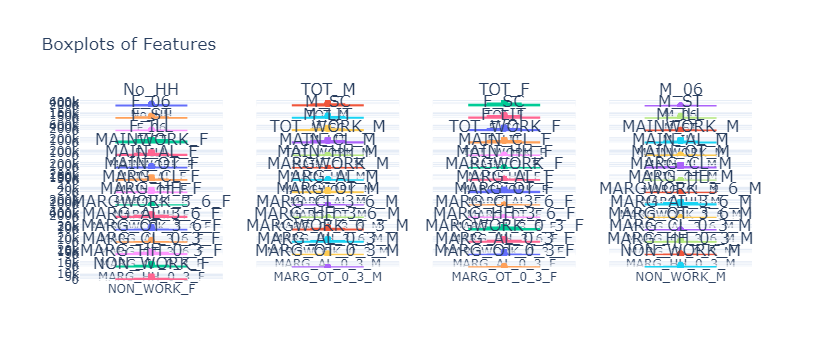

In [304]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

feature_list = df.columns

# Calculate the number of rows and columns for the subplot layout
num_features = len(feature_list)
num_cols = 4  # Set your desired number of columns
num_rows = -(-num_features // num_cols)  # Ceiling division to get the required number of rows

# Create subplots
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=feature_list, shared_yaxes=True)

# Plot each feature
for i, feature in enumerate(feature_list):
    box = go.Box(y=df[feature], name=feature)
    fig.add_trace(box, row=(i // num_cols) + 1, col=(i % num_cols) + 1)

# Update layout
fig.update_layout(showlegend=False, height=num_rows*250, title_text="Boxplots of Features")

# Show the plot
fig.show()


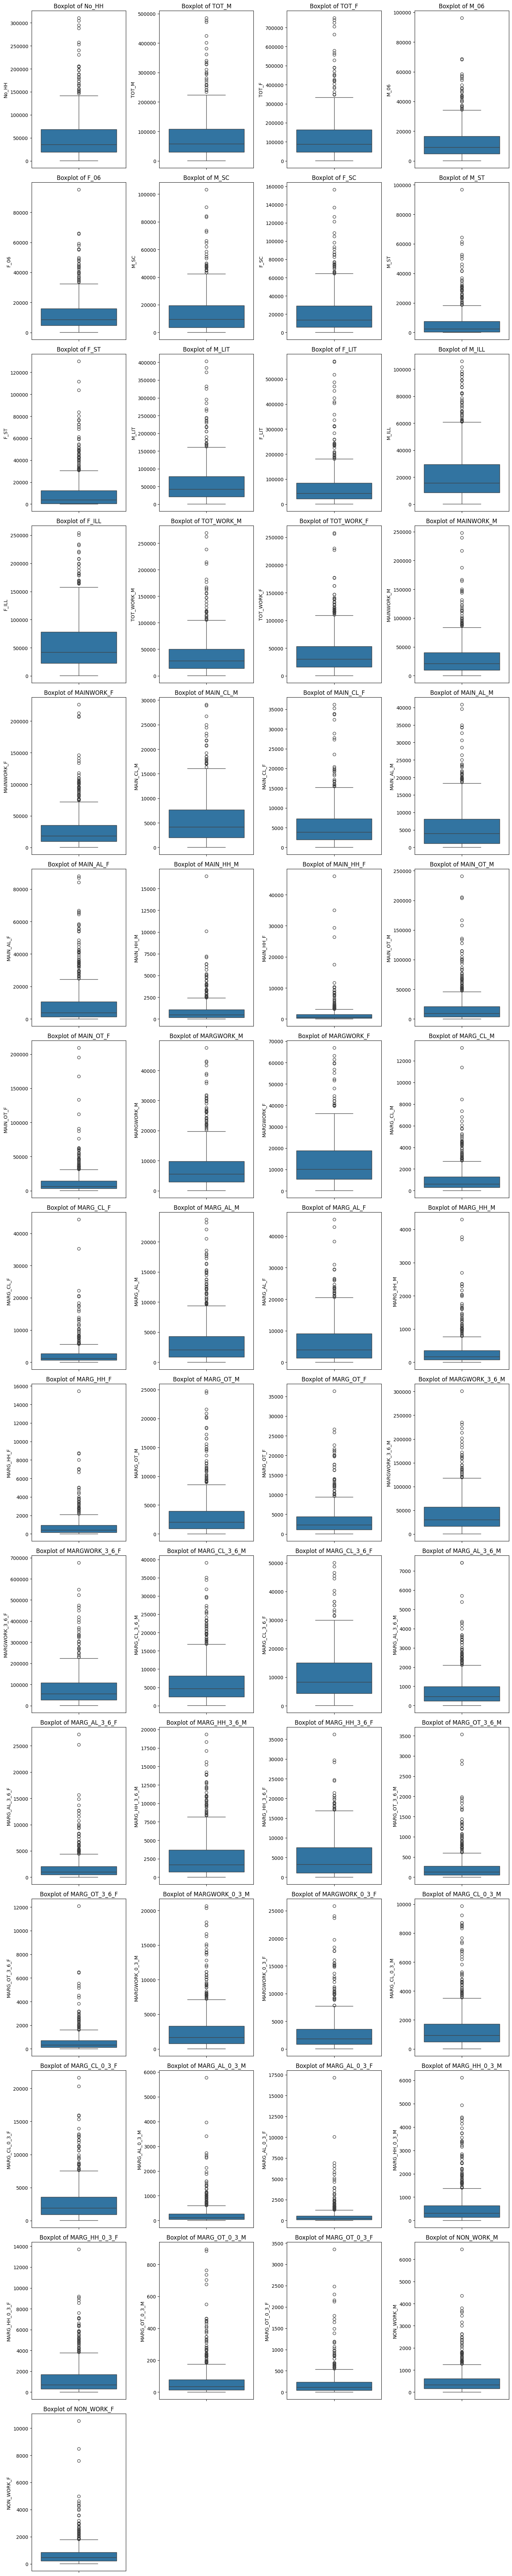

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_list = df.columns

# Calculate the number of rows and columns for the subplot layout
num_features = len(feature_list)
num_cols = 4  # Set your desired number of columns
num_rows = (num_features - 1) // num_cols + 1  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plot each feature
for i in range(num_features):
    row, col = divmod(i, num_cols)
    sns.boxplot(y=df[feature_list[i]], ax=axes[row, col])
    axes[row, col].set_title('Boxplot of {}'.format(feature_list[i]))
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [306]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [307]:
for i in feature_list:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

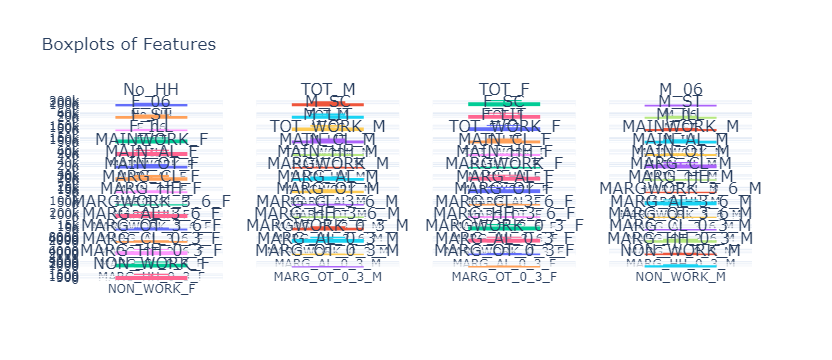

In [308]:
feature_list = df.columns

# Calculate the number of rows and columns for the subplot layout
num_features = len(feature_list)
num_cols = 4  # Set your desired number of columns
num_rows = -(-num_features // num_cols)  # Ceiling division to get the required number of rows

# Create subplots
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=feature_list, shared_yaxes=True)

# Plot each feature
for i, feature in enumerate(feature_list):
    box = go.Box(y=df[feature], name=feature)
    fig.add_trace(box, row=(i // num_cols) + 1, col=(i % num_cols) + 1)

# Update layout
fig.update_layout(showlegend=False, height=num_rows*250, title_text="Boxplots of Features")

# Show the plot
fig.show()


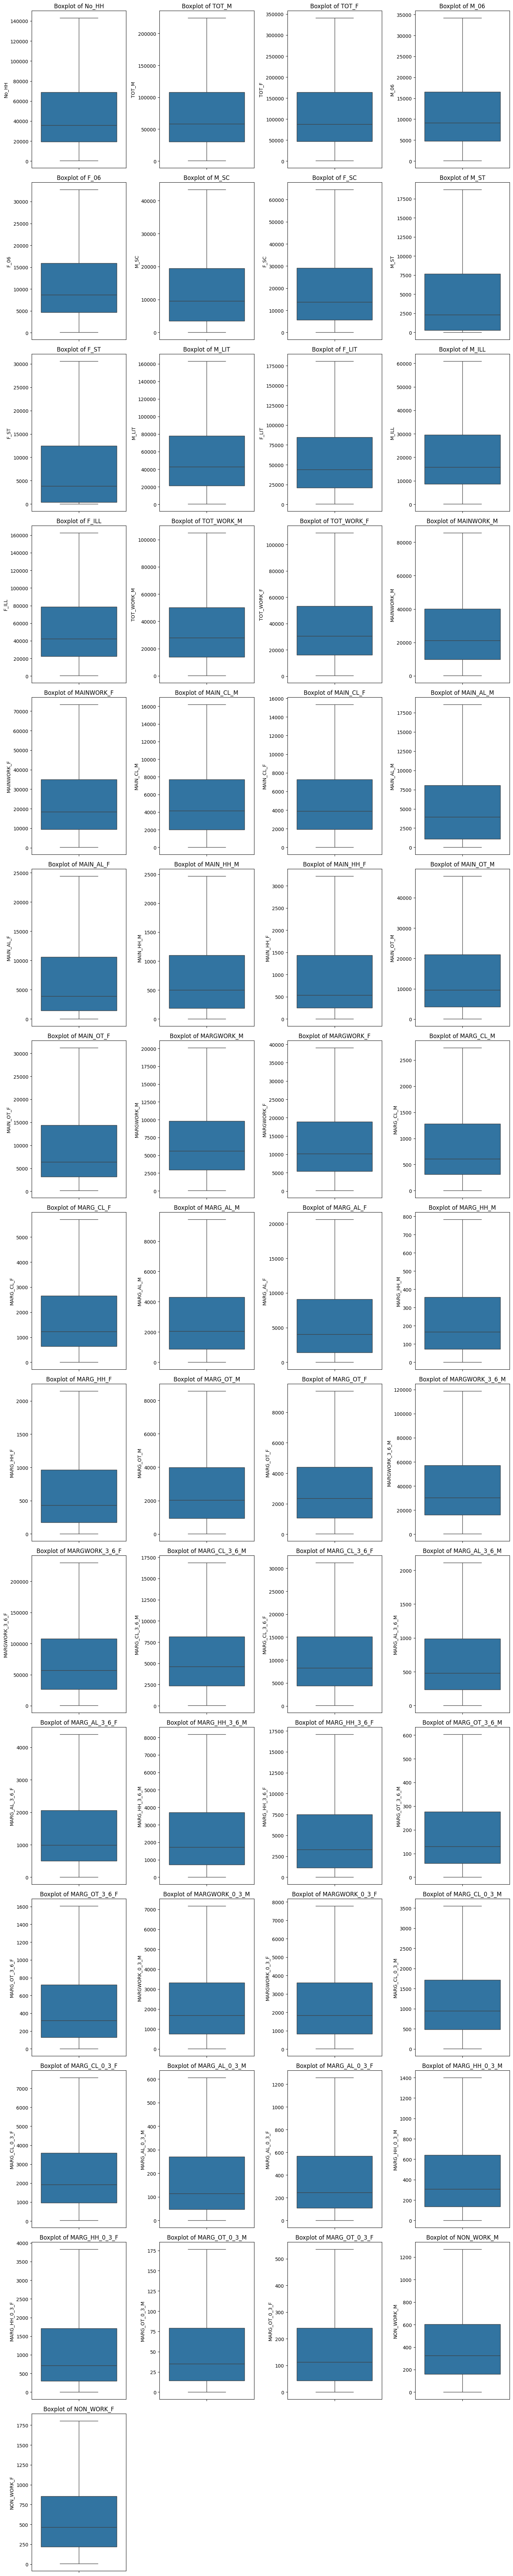

In [309]:
feature_list = df.columns

# Calculate the number of rows and columns for the subplot layout
num_features = len(feature_list)
num_cols = 4  # Set your desired number of columns
num_rows = (num_features - 1) // num_cols + 1  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plot each feature
for i in range(num_features):
    row, col = divmod(i, num_cols)
    sns.boxplot(y=df[feature_list[i]], ax=axes[row, col])
    axes[row, col].set_title('Boxplot of {}'.format(feature_list[i]))
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [310]:
from scipy.stats import zscore

# Identify numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns

df_zscore = df[numeric_columns].apply(zscore, axis=0)  # Apply z-score normalization to each column

# Display the resulting DataFrame
display(df_zscore)


No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0   -1.038986 -0.874837 -0.937027 -0.624685 -0.561282 -1.080201 -1.079963   
1   -1.076896 -0.938023 -1.009723 -0.773932 -0.835657 -1.079873 -1.079635   
2   -1.121858 -1.154665 -1.141539 -1.141642 -1.138104 -1.080201 -1.079635   
3   -1.201599 -1.217171 -1.214930 -1.197772 -1.176091 -1.080447 -1.079963   
4   -0.938495 -0.921309 -0.935018 -0.700931 -0.740523 -1.078807 -1.078160   
..        ...       ...       ...       ...       ...       ...       ...   
635 -1.150348 -1.127949 -1.132667 -1.134720 -1.117495 -1.078725 -1.078324   
636 -0.965024 -1.058299 -1.025046 -1.091676 -1.080734 -0.897218 -0.852926   
637 -1.202745 -1.237690 -1.232045 -1.234110 -1.226443 -1.080447 -1.079963   
638 -1.139425 -1.177029 -1.173597 -1.180468 -1.177539 -1.080447 -1.079963   
639 -1.032162 -1.064430 -1.064597 -1.099680 -1.100229 -1.080447 -1.079963   

         M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0   -0.510440 -0.574198 -0.939617  ...      -0.093587      -0.860882   
1   -0.771833 -0.782092 -1.005083  ...      -0.719169      -0.877096   
2    0.122588  0.137599 -1.141561  ...      -1.130551      -1.128423   
3   -0.399531 -0.437333 -1.203009  ...      -1.050477      -1.100286   
4    0.432534  0.249489 -0.942767  ...      -0.369844      -0.298617   
..        ...       ...       ...  ...            ...            ...   
635 -0.842834 -0.833741 -1.087189  ...      -1.212628      -1.195666   
636 -0.842834 -0.833741 -1.010127  ...      -1.089513      -1.057365   
637 -0.674559 -0.658914 -1.217960  ...      -1.140561      -1.154175   
638 -0.838178 -0.828746 -1.149048  ...      -1.108531      -1.136053   
639 -0.816063 -0.807367 -1.014624  ...      -1.071496      -1.159898   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
0        -0.041800      -0.423378       0.523468      -0.793688   
1        -0.347040      -0.443790      -0.634478      -0.884805   
2        -0.770091      -0.800999      -1.063434      -0.984684   
3        -0.679055      -0.701491      -1.039994      -0.970666   
4         1.484398       1.633130      -0.589942      -0.749882   
..             ...            ...            ...            ...   
635      -1.005714      -1.028083      -1.070466      -1.014472   
636      -0.989649      -0.992362      -0.981393      -0.900575   
637      -0.957519      -1.017877      -1.065778      -1.009215   
638      -0.877193      -0.915817      -1.044682      -0.996073   
639      -0.973584      -1.022980      -1.030617      -0.999578   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0        -0.443385      -0.756991   -0.497493   -0.774865  
1         0.358782       0.088391   -0.813235   -0.880662  
2        -1.026779      -1.025976   -1.008568   -1.074622  
3        -0.953855      -0.987550   -0.877454   -1.078541  
4        -0.589234      -0.379131   -0.706204   -0.257637  
..             ...            ...         ...         ...  
635      -1.026779      -1.051594   -1.102220   -1.102051  
636      -0.953855      -0.904293   -0.893509   -0.861070  
637      -0.716851      -0.750587   -0.984485   -1.043275  
638      -1.008548      -1.025976   -0.920267   -0.992336  
639      -0.990317      -1.025976   -0.791829   -1.000173  

[640 rows x 57 columns]

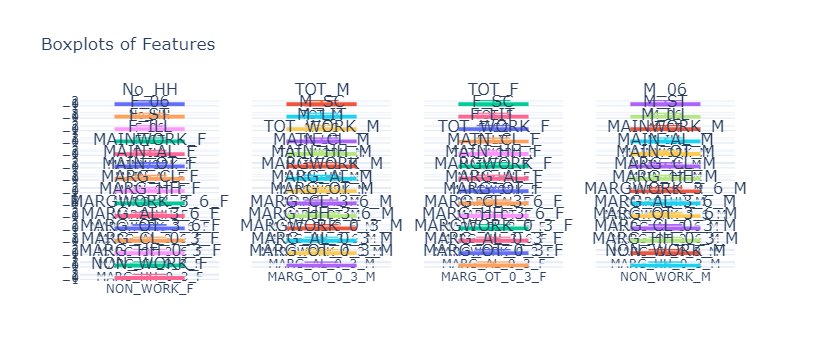

In [311]:
feature_listz = df_zscore.columns

# Calculate the number of rows and columns for the subplot layout
num_features = len(feature_listz)
num_cols = 4  # Set your desired number of columns
num_rows = -(-num_features // num_cols)  # Ceiling division to get the required number of rows

# Create subplots
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=feature_listz, shared_yaxes=True)

# Plot each feature
for i, feature in enumerate(feature_listz):
    box = go.Box(y=df_zscore[feature], name=feature)
    fig.add_trace(box, row=(i // num_cols) + 1, col=(i % num_cols) + 1)

# Update layout
fig.update_layout(showlegend=False, height=num_rows*250, title_text="Boxplots of Features")

# Show the plot
fig.show()


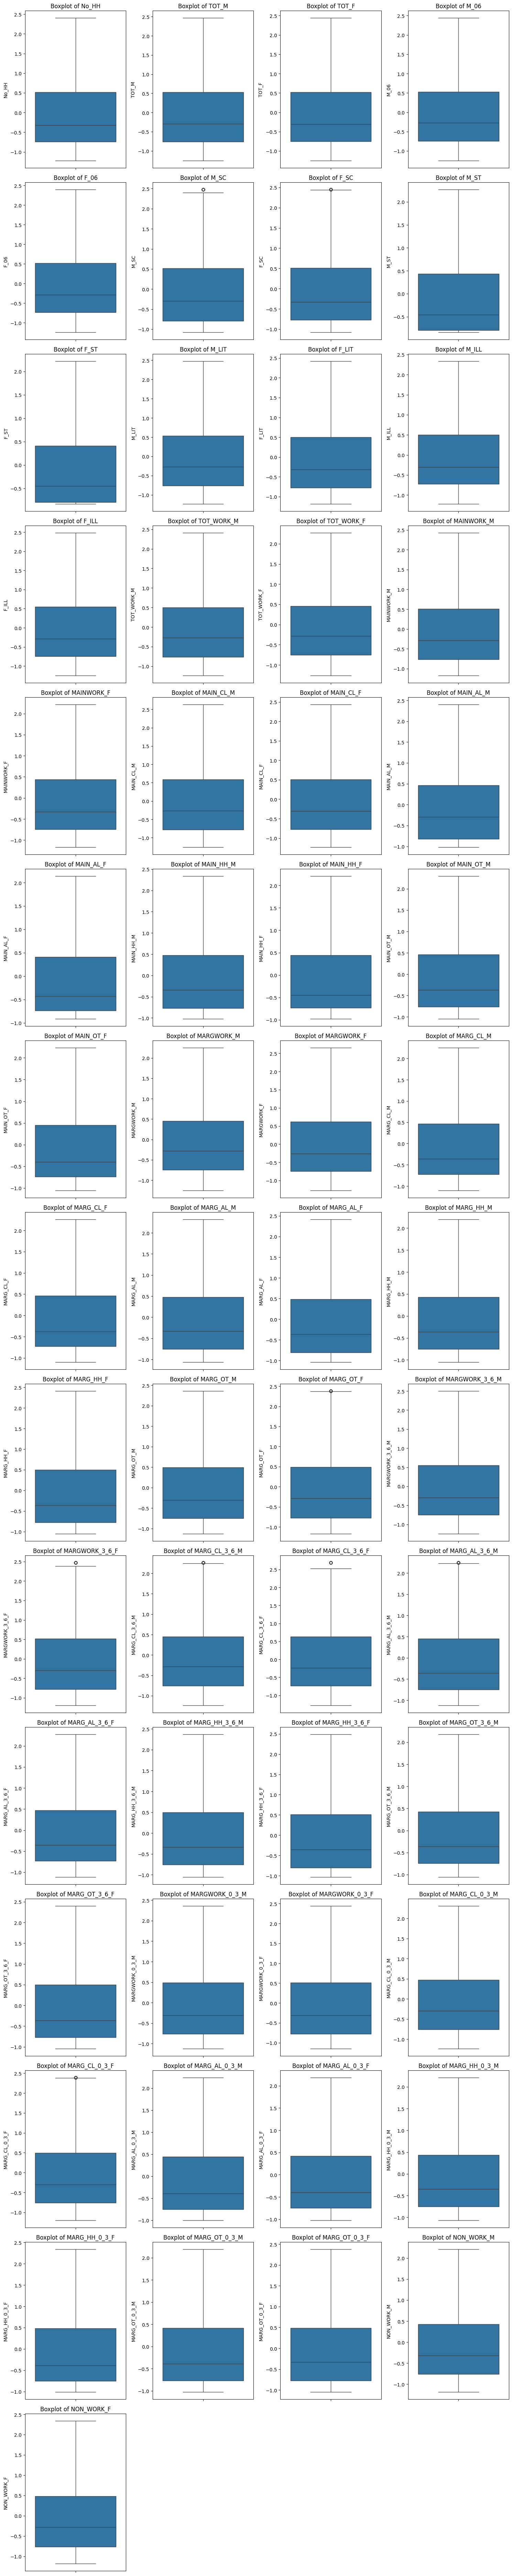

In [312]:
feature_listz = df_zscore.columns

# Calculate the number of rows and columns for the subplot layout
num_features = len(feature_listz)
num_cols = 4  # Set your desired number of columns
num_rows = (num_features - 1) // num_cols + 1  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plot each feature
for i in range(num_features):
    row, col = divmod(i, num_cols)
    sns.boxplot(y=df_zscore[feature_listz[i]], ax=axes[row, col])
    axes[row, col].set_title('Boxplot of {}'.format(feature_listz[i]))
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [314]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(df_zscore)

# Print the results
print("Chi-square value:", chi_square_value)
print("P-value:", p_value)

# Confirm the statistical significance
if p_value < 0.05:
    print("Reject the null hypothesis (H0): There are significant correlations.")
else:
    print("Fail to reject the null hypothesis (H0): Correlations are not significant.")


Chi-square value: 136416.516045734
P-value: 0.0
Reject the null hypothesis (H0): There are significant correlations.


In [315]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(df_zscore)

# Print the KMO results
#print("KMO Overall:", kmo_all)
print("KMO Model:", kmo_model)

# Confirm the adequacy of the sample size
if kmo_model > 0.7:
    print("The sample size is considered good (KMO > 0.7).")
elif kmo_model < 0.5:
    print("The sample size is not acceptable (KMO < 0.5).")
else:
    print("The sample size is marginally acceptable (0.5 <= KMO <= 0.7).")


KMO Model: 0.9361896166652609
The sample size is considered good (KMO > 0.7).


In [316]:
covmatrix = print('Covariance matrix: \n%s' %np.cov(df_zscore.T))
covmatrix

Covariance matrix: 
[[1.00156495 0.91269889 0.973013   ... 0.65276151 0.76840117 0.79788409]
 [0.91269889 1.00156495 0.98012187 ... 0.7328315  0.86616581 0.79071666]
 [0.973013   0.98012187 1.00156495 ... 0.71187751 0.83964667 0.81464163]
 ...
 [0.65276151 0.7328315  0.71187751 ... 1.00156495 0.76249106 0.72075284]
 [0.76840117 0.86616581 0.83964667 ... 0.76249106 1.00156495 0.90224595]
 [0.79788409 0.79071666 0.81464163 ... 0.72075284 0.90224595 1.00156495]]


In [356]:
#Apply PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
pca_transformed = pca.fit_transform(df_zscore)

In [357]:
#Extract eigen vectors
pca.components_

array([[ 0.14922158,  0.15916917,  0.15820921, ...,  0.14136961,
         0.14762899,  0.14210263],
       [-0.11548673, -0.08023879, -0.09371751, ...,  0.03510934,
        -0.04912234, -0.03984815],
       [ 0.1015276 , -0.03866173,  0.0289595 , ..., -0.10217491,
        -0.12667281, -0.02854464],
       ...,
       [ 0.00112879, -0.00673066,  0.02298648, ..., -0.01159627,
         0.05608352, -0.00610478],
       [ 0.00070908,  0.04637872,  0.00402434, ...,  0.01406358,
        -0.07729171, -0.00056173],
       [-0.00461221, -0.00370327,  0.00963954, ...,  0.00227908,
         0.00539901,  0.00130606]])

In [358]:
#Check the eigen values
pca.explained_variance_

array([3.56488638e+01, 7.64357559e+00, 3.76919551e+00, 2.77722349e+00,
       1.90694892e+00, 1.15490310e+00, 9.87726707e-01, 4.64629906e-01,
       3.96708513e-01, 3.22346888e-01, 2.73207369e-01, 2.35647574e-01,
       1.81401107e-01, 1.69243770e-01, 1.38592325e-01, 1.31505852e-01,
       1.03809666e-01, 9.55333831e-02, 8.58580407e-02, 8.09138742e-02,
       6.60179067e-02, 6.30797999e-02, 4.82756124e-02, 4.59506197e-02,
       4.37747566e-02, 3.19339710e-02, 2.86194563e-02, 2.75481445e-02,
       2.34340044e-02, 2.20296816e-02, 1.87487040e-02, 1.59004895e-02,
       1.39957919e-02, 1.18916465e-02, 1.11133495e-02, 9.07842645e-03,
       7.25127869e-03, 6.27213692e-03, 4.95541908e-03, 4.60667097e-03,
       3.45902033e-03, 2.18408510e-03, 2.13514664e-03, 1.92111328e-03,
       1.43840980e-03, 1.09968912e-03, 9.65752052e-04, 8.62630267e-04,
       6.51634478e-04, 5.76658846e-04, 4.35790607e-04, 3.70037468e-04,
       3.06660171e-04, 2.07854170e-04, 1.38286484e-04, 8.97034441e-05,
      

In [361]:
prefix = 'PC'
start_index = 1
end_index = 57

# Generate the list of columns from 'PC1' to 'PC57'
columns = [f'{prefix}{i}' for i in range(start_index, end_index + 1)]

# Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T,
                                     columns=columns,
                                     index=df_zscore.columns)

In [362]:
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
No_HH           0.149222 -0.115487  0.101528  0.076814 -0.012090  0.082558   
TOT_M           0.159169 -0.080239 -0.038662  0.052976 -0.042344  0.073667   
TOT_F           0.158209 -0.093718  0.028959  0.070022 -0.022927  0.082812   
M_06            0.156340 -0.020341 -0.074419  0.028520 -0.080339  0.092379   
F_06            0.156814 -0.014310 -0.068223  0.016398 -0.078326  0.080010   
M_SC            0.143350 -0.079667 -0.037619  0.010210 -0.167893  0.050969   
F_SC            0.143537 -0.087098  0.021350  0.016244 -0.158092  0.054568   
M_ST            0.018849  0.069101  0.323827  0.091143  0.418412 -0.231809   
F_ST            0.017878  0.067316  0.338705  0.079554  0.415965 -0.214542   
M_LIT           0.155152 -0.105986 -0.032107  0.089187 -0.014033  0.081378   
F_LIT           0.145450 -0.133234 -0.005133  0.125412  0.029084  0.102207   
M_ILL           0.154551 -0.009460 -0.047054 -0.034665 -0.104073  0.037957   
F_ILL           0.158283 -0.021793  0.079345 -0.010578 -0.110332  0.013986   
TOT_WORK_M      0.154076 -0.120912 -0.001116  0.069046 -0.023104  0.035802   
TOT_WORK_F      0.142530 -0.076003  0.194130  0.111057 -0.018931 -0.016587   
MAINWORK_M      0.141932 -0.166700  0.019821  0.100188 -0.043225  0.018054   
MAINWORK_F      0.125732 -0.142250  0.209976  0.133013 -0.054674 -0.051951   
MAIN_CL_M       0.111692  0.042552  0.033131  0.078851 -0.303376 -0.293504   
MAIN_CL_F       0.083035  0.095893  0.188822  0.265022 -0.257925 -0.269914   
MAIN_AL_M       0.119291 -0.053342  0.225831 -0.121379 -0.253131 -0.023336   
MAIN_AL_F       0.090089 -0.072467  0.356566 -0.020989 -0.199220 -0.056558   
MAIN_HH_M       0.141850 -0.101835 -0.102202 -0.021969 -0.060812 -0.142869   
MAIN_HH_F       0.133880 -0.113257  0.021613 -0.045436 -0.023063 -0.318474   
MAIN_OT_M       0.122762 -0.203602 -0.028144  0.147025  0.069907  0.071214   
MAIN_OT_F       0.116866 -0.205899  0.069034  0.155917  0.106774  0.033885   
MARGWORK_M      0.156656  0.079039 -0.068685 -0.078572  0.065812  0.078655   
MARGWORK_F      0.148695  0.108813  0.104957  0.015788  0.077624  0.099156   
MARG_CL_M       0.088163  0.271522 -0.104745  0.157104 -0.018005 -0.032738   
MARG_CL_F       0.065160  0.275398 -0.036325  0.285024 -0.055152 -0.031787   
MARG_AL_M       0.127278  0.156579  0.070434 -0.250594 -0.047200  0.079748   
MARG_AL_F       0.115888  0.135048  0.259987 -0.153798 -0.012643  0.117625   
MARG_HH_M       0.145366  0.040974 -0.144347 -0.167540  0.005575 -0.169980   
MARG_HH_F       0.142302  0.006685 -0.093838 -0.151469  0.043616 -0.319596   
MARG_OT_M       0.150877 -0.073440 -0.131415  0.021195  0.145109  0.018232   
MARG_OT_F       0.148018 -0.088361 -0.053883  0.059961  0.190756  0.002409   
MARGWORK_3_6_M  0.157908 -0.044044 -0.066877  0.039319 -0.059886  0.103377   
MARGWORK_3_6_F  0.155831 -0.092383 -0.058718  0.046130 -0.022476  0.117467   
MARG_CL_3_6_M   0.157640  0.066208 -0.060172 -0.091315  0.059078  0.072381   
MARG_CL_3_6_F   0.149501  0.089651  0.125792  0.018865  0.064349  0.070896   
MARG_AL_3_6_M   0.094785  0.261268 -0.096551  0.131591 -0.013887 -0.041377   
MARG_AL_3_6_F   0.067158  0.266691 -0.018256  0.292845 -0.061019 -0.049367   
MARG_HH_3_6_M   0.128184  0.149831  0.078194 -0.250337 -0.058665  0.073152   
MARG_HH_3_6_F   0.113959  0.120648  0.283235 -0.143045 -0.025386  0.094868   
MARG_OT_3_6_M   0.145108  0.036763 -0.142511 -0.166002  0.003315 -0.174634   
MARG_OT_3_6_F   0.141029 -0.003685 -0.089356 -0.142599  0.041678 -0.343970   
MARGWORK_0_3_M  0.150922 -0.077739 -0.130687  0.019887  0.132794  0.015826   
MARGWORK_0_3_F  0.147534 -0.101141 -0.058489  0.060087  0.170596 -0.004857   
MARG_CL_0_3_M   0.142987  0.136839 -0.103565 -0.018223  0.094293  0.111045   
MARG_CL_0_3_F   0.133784  0.166416  0.033423  0.005954  0.112351  0.185882   
MARG_AL_0_3_M   0.062964  0.281881 -0.120293  0.208941 -0.018070 -0.004600   
MARG_AL_0_3_F   0.056741  0.287541 -0.08809

In [363]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.62444145, 0.75832974, 0.82435265, 0.87299974, 0.90640271,
       0.92663251, 0.94393397, 0.95207264, 0.95902156, 0.96466793,
       0.96945356, 0.97358126, 0.97675877, 0.97972332, 0.98215096,
       0.98445448, 0.98627285, 0.98794626, 0.98945019, 0.99086751,
       0.99202391, 0.99312884, 0.99397446, 0.99477935, 0.99554613,
       0.9961055 , 0.99660681, 0.99708936, 0.99749984, 0.99788572,
       0.99821413, 0.99849265, 0.99873781, 0.99894611, 0.99914077,
       0.99929979, 0.99942681, 0.99953668, 0.99962348, 0.99970417,
       0.99976476, 0.99980302, 0.99984042, 0.99987407, 0.99989927,
       0.99991853, 0.99993544, 0.99995055, 0.99996197, 0.99997207,
       0.9999797 , 0.99998619, 0.99999156, 0.9999952 , 0.99999762,
       0.99999919, 1.        ])

In [364]:
#Choose the PCs
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]
df_selected

PC1       PC2       PC3       PC4       PC5
No_HH           0.149222 -0.115487  0.101528  0.076814 -0.012090
TOT_M           0.159169 -0.080239 -0.038662  0.052976 -0.042344
TOT_F           0.158209 -0.093718  0.028959  0.070022 -0.022927
M_06            0.156340 -0.020341 -0.074419  0.028520 -0.080339
F_06            0.156814 -0.014310 -0.068223  0.016398 -0.078326
M_SC            0.143350 -0.079667 -0.037619  0.010210 -0.167893
F_SC            0.143537 -0.087098  0.021350  0.016244 -0.158092
M_ST            0.018849  0.069101  0.323827  0.091143  0.418412
F_ST            0.017878  0.067316  0.338705  0.079554  0.415965
M_LIT           0.155152 -0.105986 -0.032107  0.089187 -0.014033
F_LIT           0.145450 -0.133234 -0.005133  0.125412  0.029084
M_ILL           0.154551 -0.009460 -0.047054 -0.034665 -0.104073
F_ILL           0.158283 -0.021793  0.079345 -0.010578 -0.110332
TOT_WORK_M      0.154076 -0.120912 -0.001116  0.069046 -0.023104
TOT_WORK_F      0.142530 -0.076003  0.194130  0.111057 -0.018931
MAINWORK_M      0.141932 -0.166700  0.019821  0.100188 -0.043225
MAINWORK_F      0.125732 -0.142250  0.209976  0.133013 -0.054674
MAIN_CL_M       0.111692  0.042552  0.033131  0.078851 -0.303376
MAIN_CL_F       0.083035  0.095893  0.188822  0.265022 -0.257925
MAIN_AL_M       0.119291 -0.053342  0.225831 -0.121379 -0.253131
MAIN_AL_F       0.090089 -0.072467  0.356566 -0.020989 -0.199220
MAIN_HH_M       0.141850 -0.101835 -0.102202 -0.021969 -0.060812
MAIN_HH_F       0.133880 -0.113257  0.021613 -0.045436 -0.023063
MAIN_OT_M       0.122762 -0.203602 -0.028144  0.147025  0.069907
MAIN_OT_F       0.116866 -0.205899  0.069034  0.155917  0.106774
MARGWORK_M      0.156656  0.079039 -0.068685 -0.078572  0.065812
MARGWORK_F      0.148695  0.108813  0.104957  0.015788  0.077624
MARG_CL_M       0.088163  0.271522 -0.104745  0.157104 -0.018005
MARG_CL_F       0.065160  0.275398 -0.036325  0.285024 -0.055152
MARG_AL_M       0.127278  0.156579  0.070434 -0.250594 -0.047200
MARG_AL_F       0.115888  0.135048  0.259987 -0.153798 -0.012643
MARG_HH_M       0.145366  0.040974 -0.144347 -0.167540  0.005575
MARG_HH_F       0.142302  0.006685 -0.093838 -0.151469  0.043616
MARG_OT_M       0.150877 -0.073440 -0.131415  0.021195  0.145109
MARG_OT_F       0.148018 -0.088361 -0.053883  0.059961  0.190756
MARGWORK_3_6_M  0.157908 -0.044044 -0.066877  0.039319 -0.059886
MARGWORK_3_6_F  0.155831 -0.092383 -0.058718  0.046130 -0.022476
MARG_CL_3_6_M   0.157640  0.066208 -0.060172 -0.091315  0.059078
MARG_CL_3_6_F   0.149501  0.089651  0.125792  0.018865  0.064349
MARG_AL_3_6_M   0.094785  0.261268 -0.096551  0.131591 -0.013887
MARG_AL_3_6_F   0.067158  0.266691 -0.018256  0.292845 -0.061019
MARG_HH_3_6_M   0.128184  0.149831  0.078194 -0.250337 -0.058665
MARG_HH_3_6_F   0.113959  0.120648  0.283235 -0.143045 -0.025386
MARG_OT_3_6_M   0.145108  0.036763 -0.142511 -0.166002  0.003315
MARG_OT_3_6_F   0.141029 -0.003685 -0.089356 -0.142599  0.041678
MARGWORK_0_3_M  0.150922 -0.077739 -0.130687  0.019887  0.132794
MARGWORK_0_3_F  0.147534 -0.101141 -0.058489  0.060087  0.170596
MARG_CL_0_3_M   0.142987  0.136839 -0.103565 -0.018223  0.094293
MARG_CL_0_3_F   0.133784  0.166416  0.033423  0.005954  0.112351
MARG_AL_0_3_M   0.062964  0.281881 -0.120293  0.208941 -0.018070
MARG_AL_0_3_F   0.056741  0.287541 -0.088097  0.240499 -0.036293
MARG_HH_0_3_M   0.119102  0.182341  0.026176 -0.240416  0.016981
MARG_HH_0_3_F   0.113044  0.177112  0.164774 -0.189408  0.047538
MARG_OT_0_3_M   0.142140  0.052925 -0.144419 -0.167554  0.014187
MARG_OT_0_3_F   0.141370  0.035109 -0.102175 -0.169020  0.047504
NON_WORK_M      0.147629 -0.049122 -0.126673  0.024036  0.191790
NON_WORK_F      0.142103 -0.039848 -0.028545  0.057402  0.249765

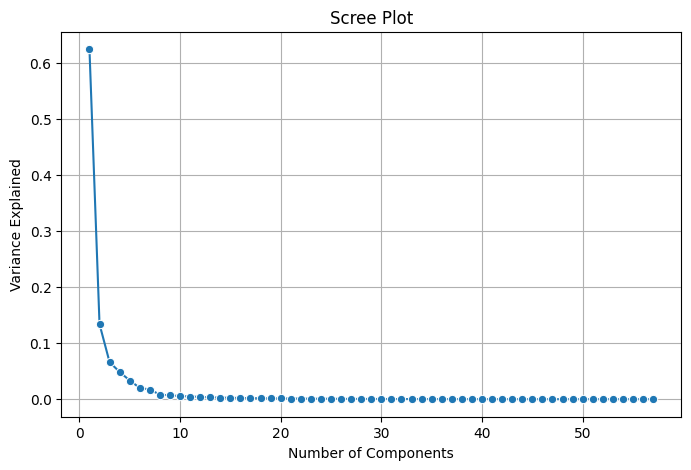

In [366]:
#scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ , x=range(1, len(pca.explained_variance_ratio_)+1), marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

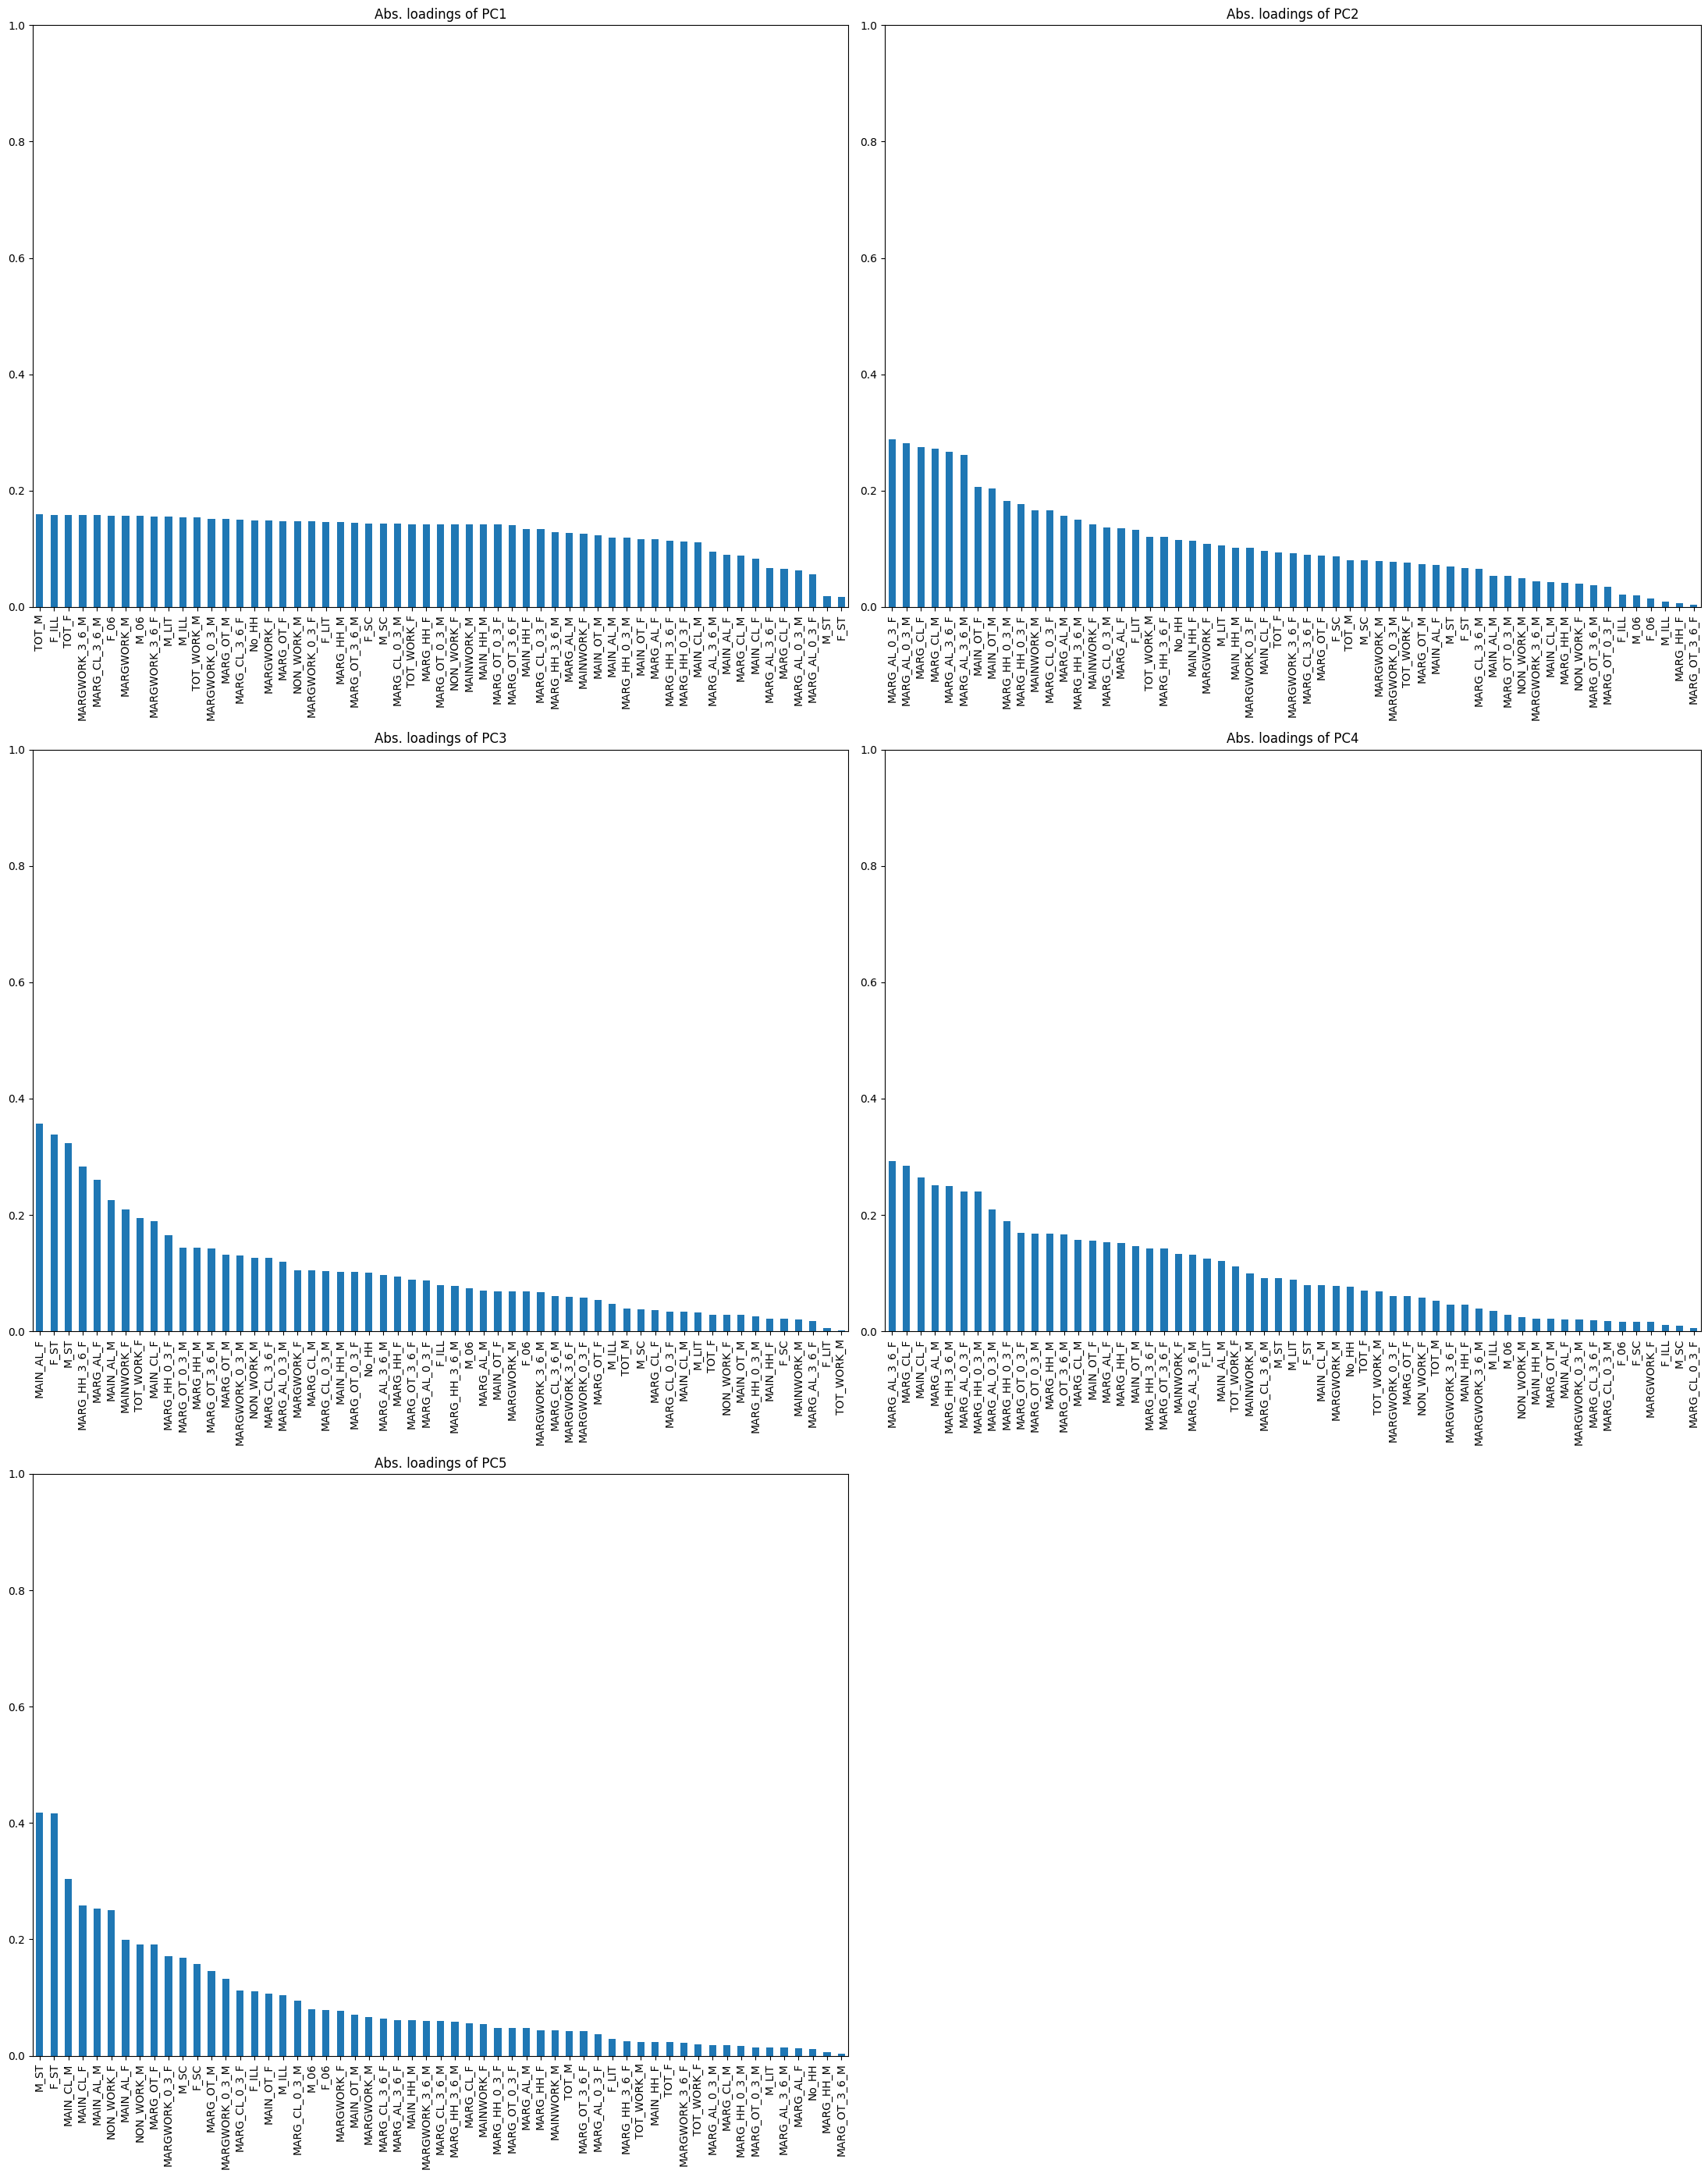

In [367]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (22,28))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()


All values for PC1:
TOT_M: 0.16
F_ILL: 0.16
TOT_F: 0.16
MARGWORK_3_6_M: 0.16
MARG_CL_3_6_M: 0.16
F_06: 0.16
MARGWORK_M: 0.16
M_06: 0.16
MARGWORK_3_6_F: 0.16
M_LIT: 0.16
M_ILL: 0.15
TOT_WORK_M: 0.15
MARGWORK_0_3_M: 0.15
MARG_OT_M: 0.15
MARG_CL_3_6_F: 0.15
No_HH: 0.15
MARGWORK_F: 0.15
MARG_OT_F: 0.15
NON_WORK_M: 0.15
MARGWORK_0_3_F: 0.15
F_LIT: 0.15
MARG_HH_M: 0.15
MARG_OT_3_6_M: 0.15
F_SC: 0.14
M_SC: 0.14
MARG_CL_0_3_M: 0.14
TOT_WORK_F: 0.14
MARG_HH_F: 0.14
MARG_OT_0_3_M: 0.14
NON_WORK_F: 0.14
MAINWORK_M: 0.14
MAIN_HH_M: 0.14
MARG_OT_0_3_F: 0.14
MARG_OT_3_6_F: 0.14
MAIN_HH_F: 0.13
MARG_CL_0_3_F: 0.13
MARG_HH_3_6_M: 0.13
MARG_AL_M: 0.13
MAINWORK_F: 0.13
MAIN_OT_M: 0.12
MAIN_AL_M: 0.12
MARG_HH_0_3_M: 0.12
MAIN_OT_F: 0.12
MARG_AL_F: 0.12
MARG_HH_3_6_F: 0.11
MARG_HH_0_3_F: 0.11
MAIN_CL_M: 0.11
MARG_AL_3_6_M: 0.09
MAIN_AL_F: 0.09
MARG_CL_M: 0.09
MAIN_CL_F: 0.08
MARG_AL_3_6_F: 0.07
MARG_CL_F: 0.07
MARG_AL_0_3_M: 0.06
MARG_AL_0_3_F: 0.06
M_ST: 0.02
F_ST: 0.02

All values for PC2:
MARG_AL_0_3_

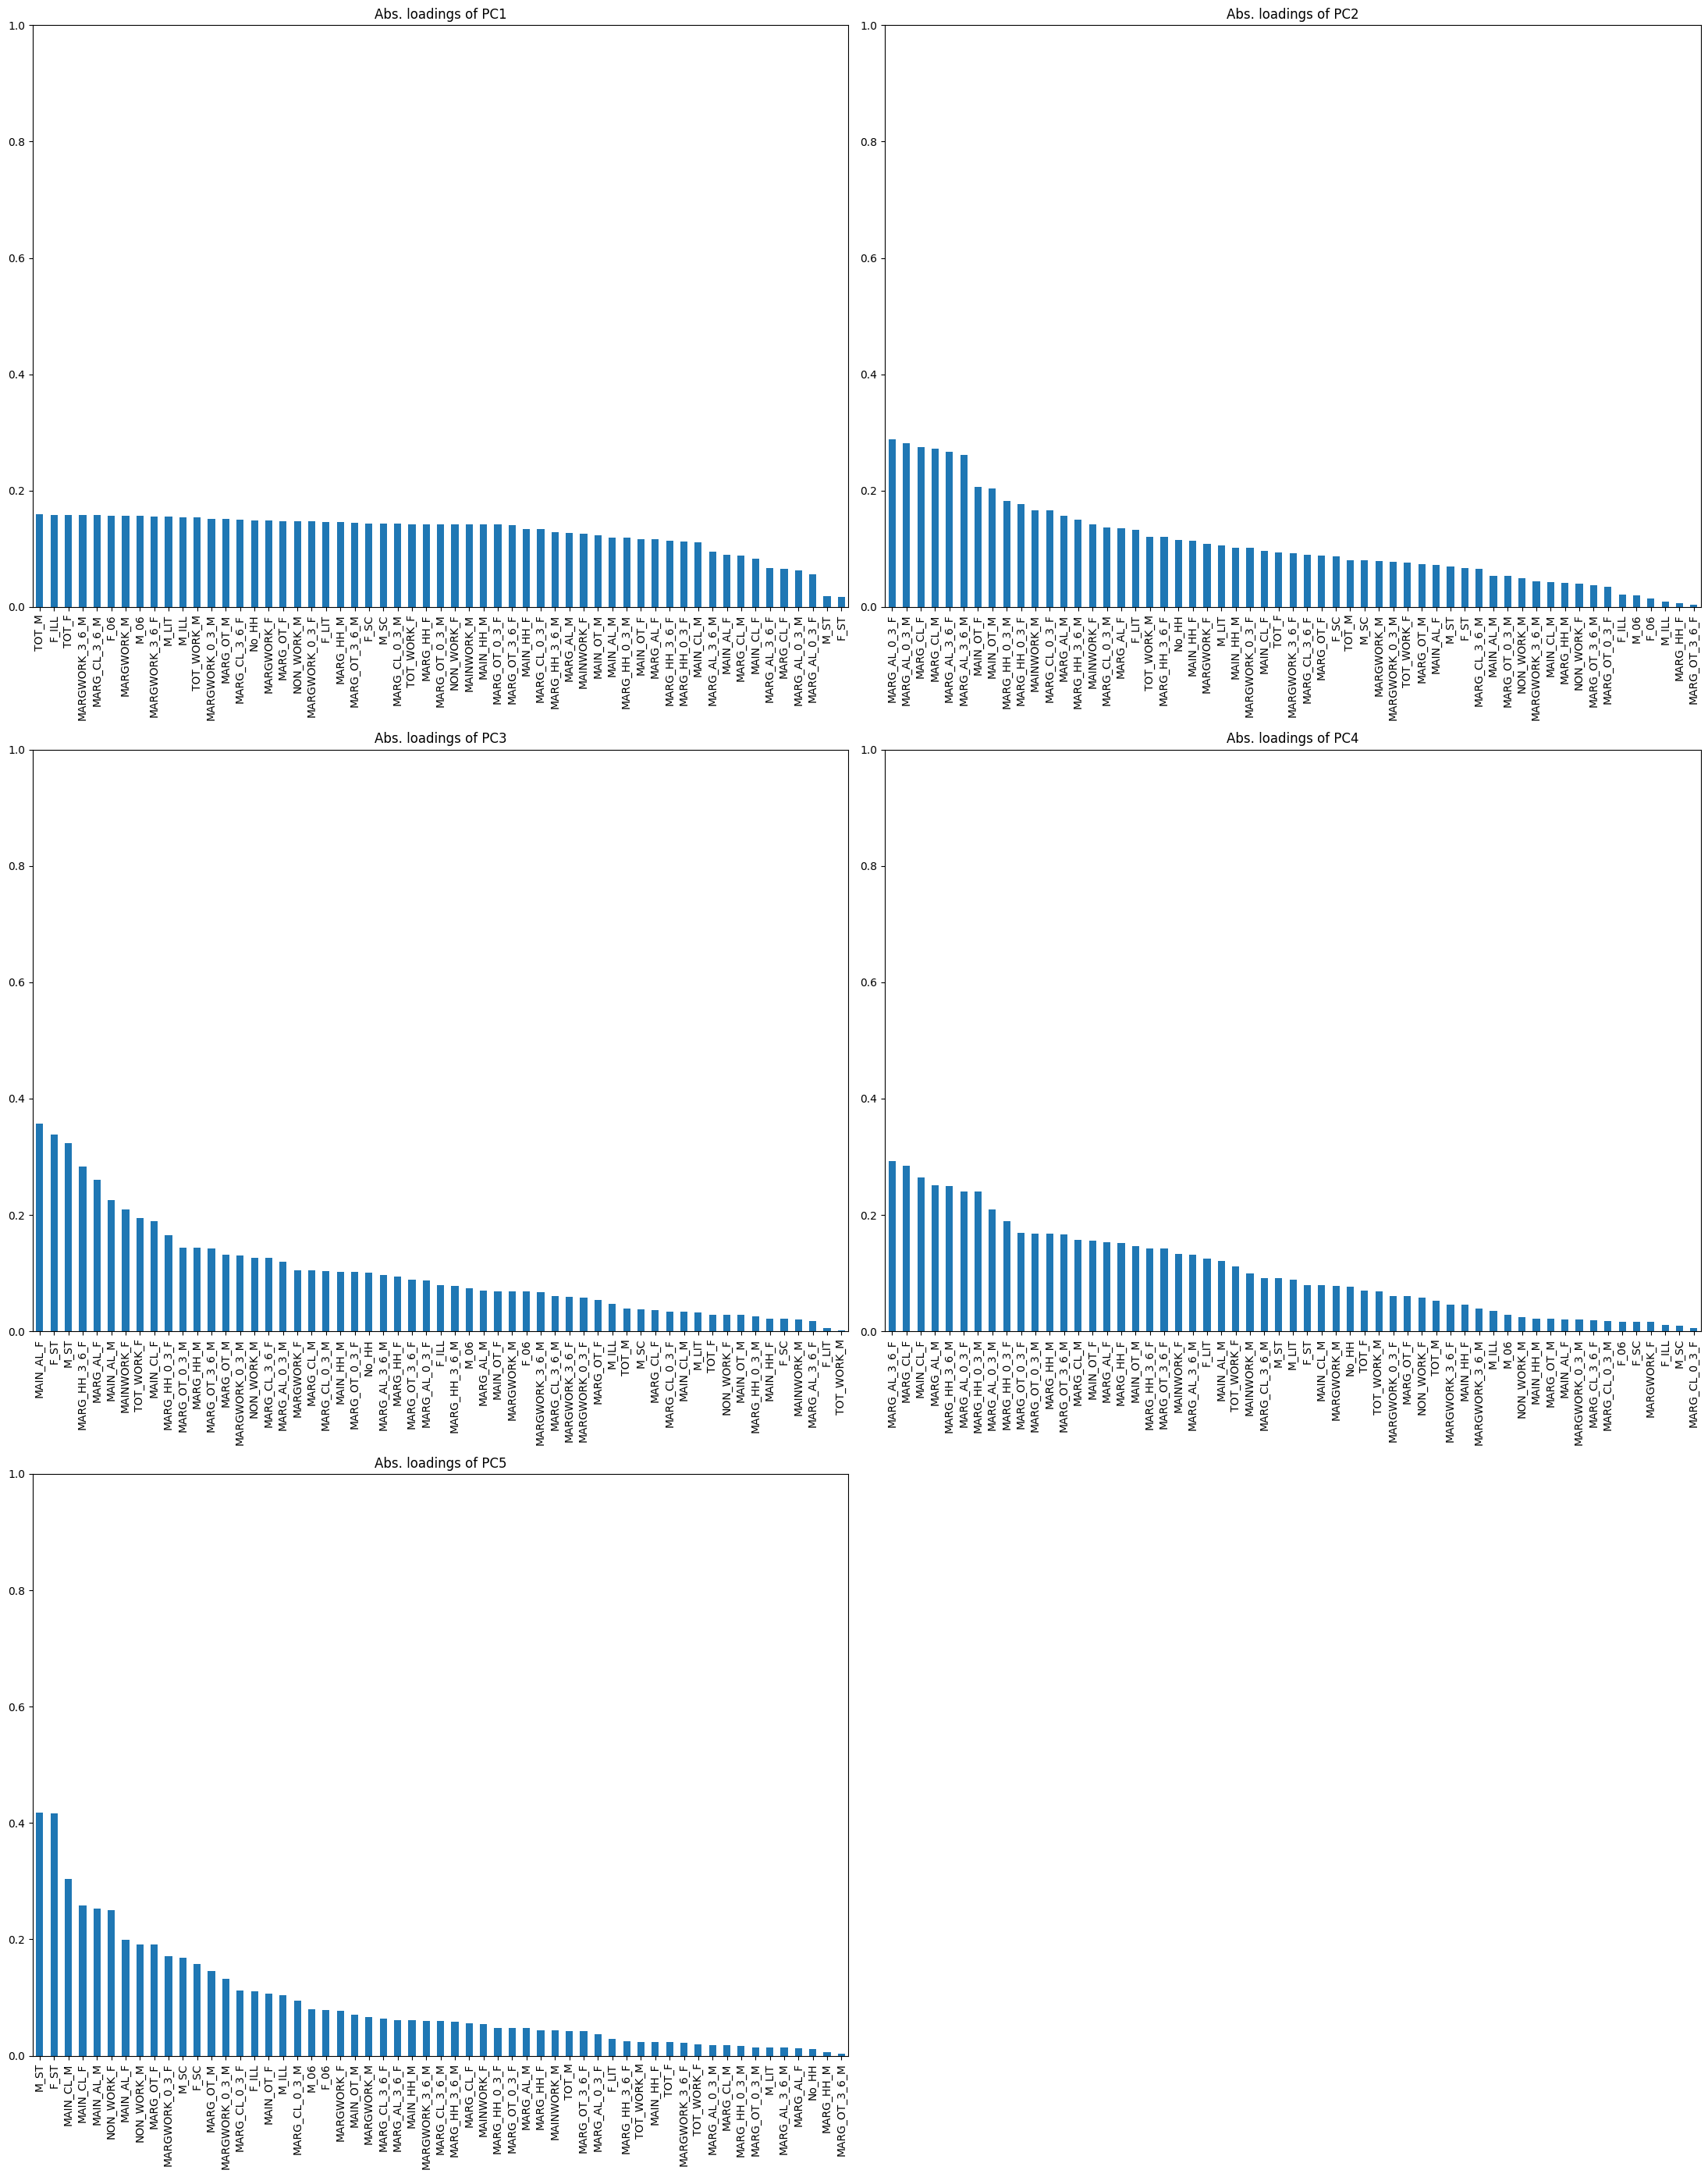

In [368]:
plt.figure(figsize=(22, 28))

for i in range(len(df_selected.columns)):
    plt.subplot(3, 2, i + 1)
    sorted_values = abs(df_selected[df_selected.columns[i]]).sort_values(ascending=False)
    sorted_values.plot.bar()
    plt.yticks(np.arange(0, 1.2, 0.2))
    plt.title(f'Abs. loadings of {df_selected.columns[i]}')
    plt.tight_layout()

    # Print all values
    print(f"\nAll values for {df_selected.columns[i]}:")
    for index, value in sorted_values.items():
        print(f"{index}: {value:.2f}")

plt.show()


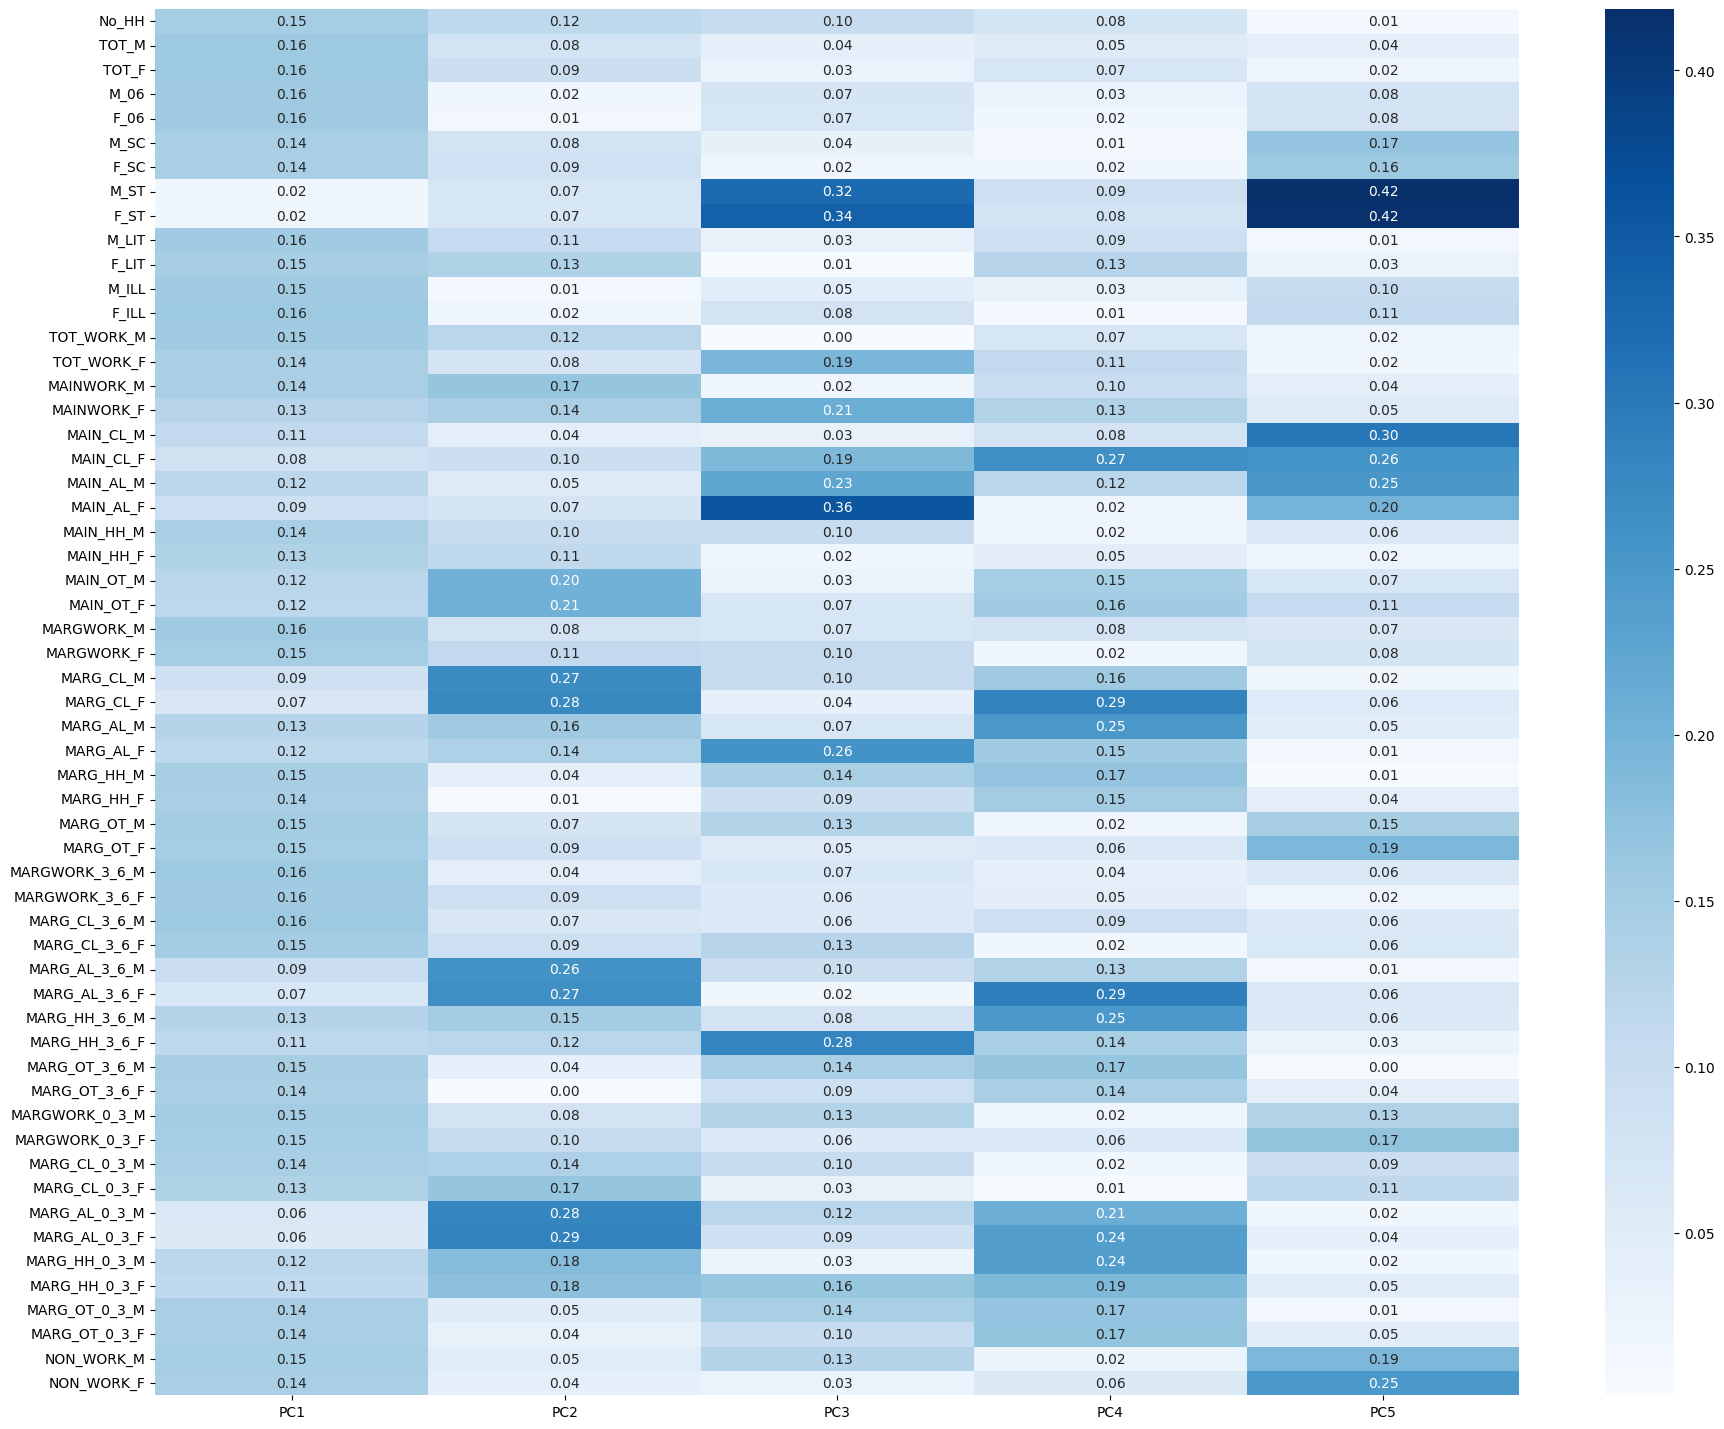

In [327]:
#Compare how the original features influence various PCs
plt.figure(figsize = (22,18))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

Correlation values in descending order:
PC5 - M_ST: 0.42
PC5 - F_ST: 0.42
PC3 - MAIN_AL_F: 0.36
PC3 - F_ST: 0.34
PC3 - M_ST: 0.32
PC5 - MAIN_CL_M: 0.30
PC4 - MARG_AL_3_6_F: 0.29
PC2 - MARG_AL_0_3_F: 0.29
PC4 - MARG_CL_F: 0.29
PC3 - MARG_HH_3_6_F: 0.28
PC2 - MARG_AL_0_3_M: 0.28
PC2 - MARG_CL_F: 0.28
PC2 - MARG_CL_M: 0.27
PC2 - MARG_AL_3_6_F: 0.27
PC4 - MAIN_CL_F: 0.27
PC2 - MARG_AL_3_6_M: 0.26
PC3 - MARG_AL_F: 0.26
PC5 - MAIN_CL_F: 0.26
PC5 - MAIN_AL_M: 0.25
PC4 - MARG_AL_M: 0.25
PC4 - MARG_HH_3_6_M: 0.25
PC5 - NON_WORK_F: 0.25
PC4 - MARG_AL_0_3_F: 0.24
PC4 - MARG_HH_0_3_M: 0.24
PC3 - MAIN_AL_M: 0.23
PC3 - MAINWORK_F: 0.21
PC4 - MARG_AL_0_3_M: 0.21
PC2 - MAIN_OT_F: 0.21
PC2 - MAIN_OT_M: 0.20
PC5 - MAIN_AL_F: 0.20
PC3 - TOT_WORK_F: 0.19
PC5 - NON_WORK_M: 0.19
PC5 - MARG_OT_F: 0.19
PC4 - MARG_HH_0_3_F: 0.19
PC3 - MAIN_CL_F: 0.19
PC2 - MARG_HH_0_3_M: 0.18
PC2 - MARG_HH_0_3_F: 0.18
PC5 - MARGWORK_0_3_F: 0.17
PC4 - MARG_OT_0_3_F: 0.17
PC5 - M_SC: 0.17
PC4 - MARG_OT_0_3_M: 0.17
PC4 - MARG_HH_

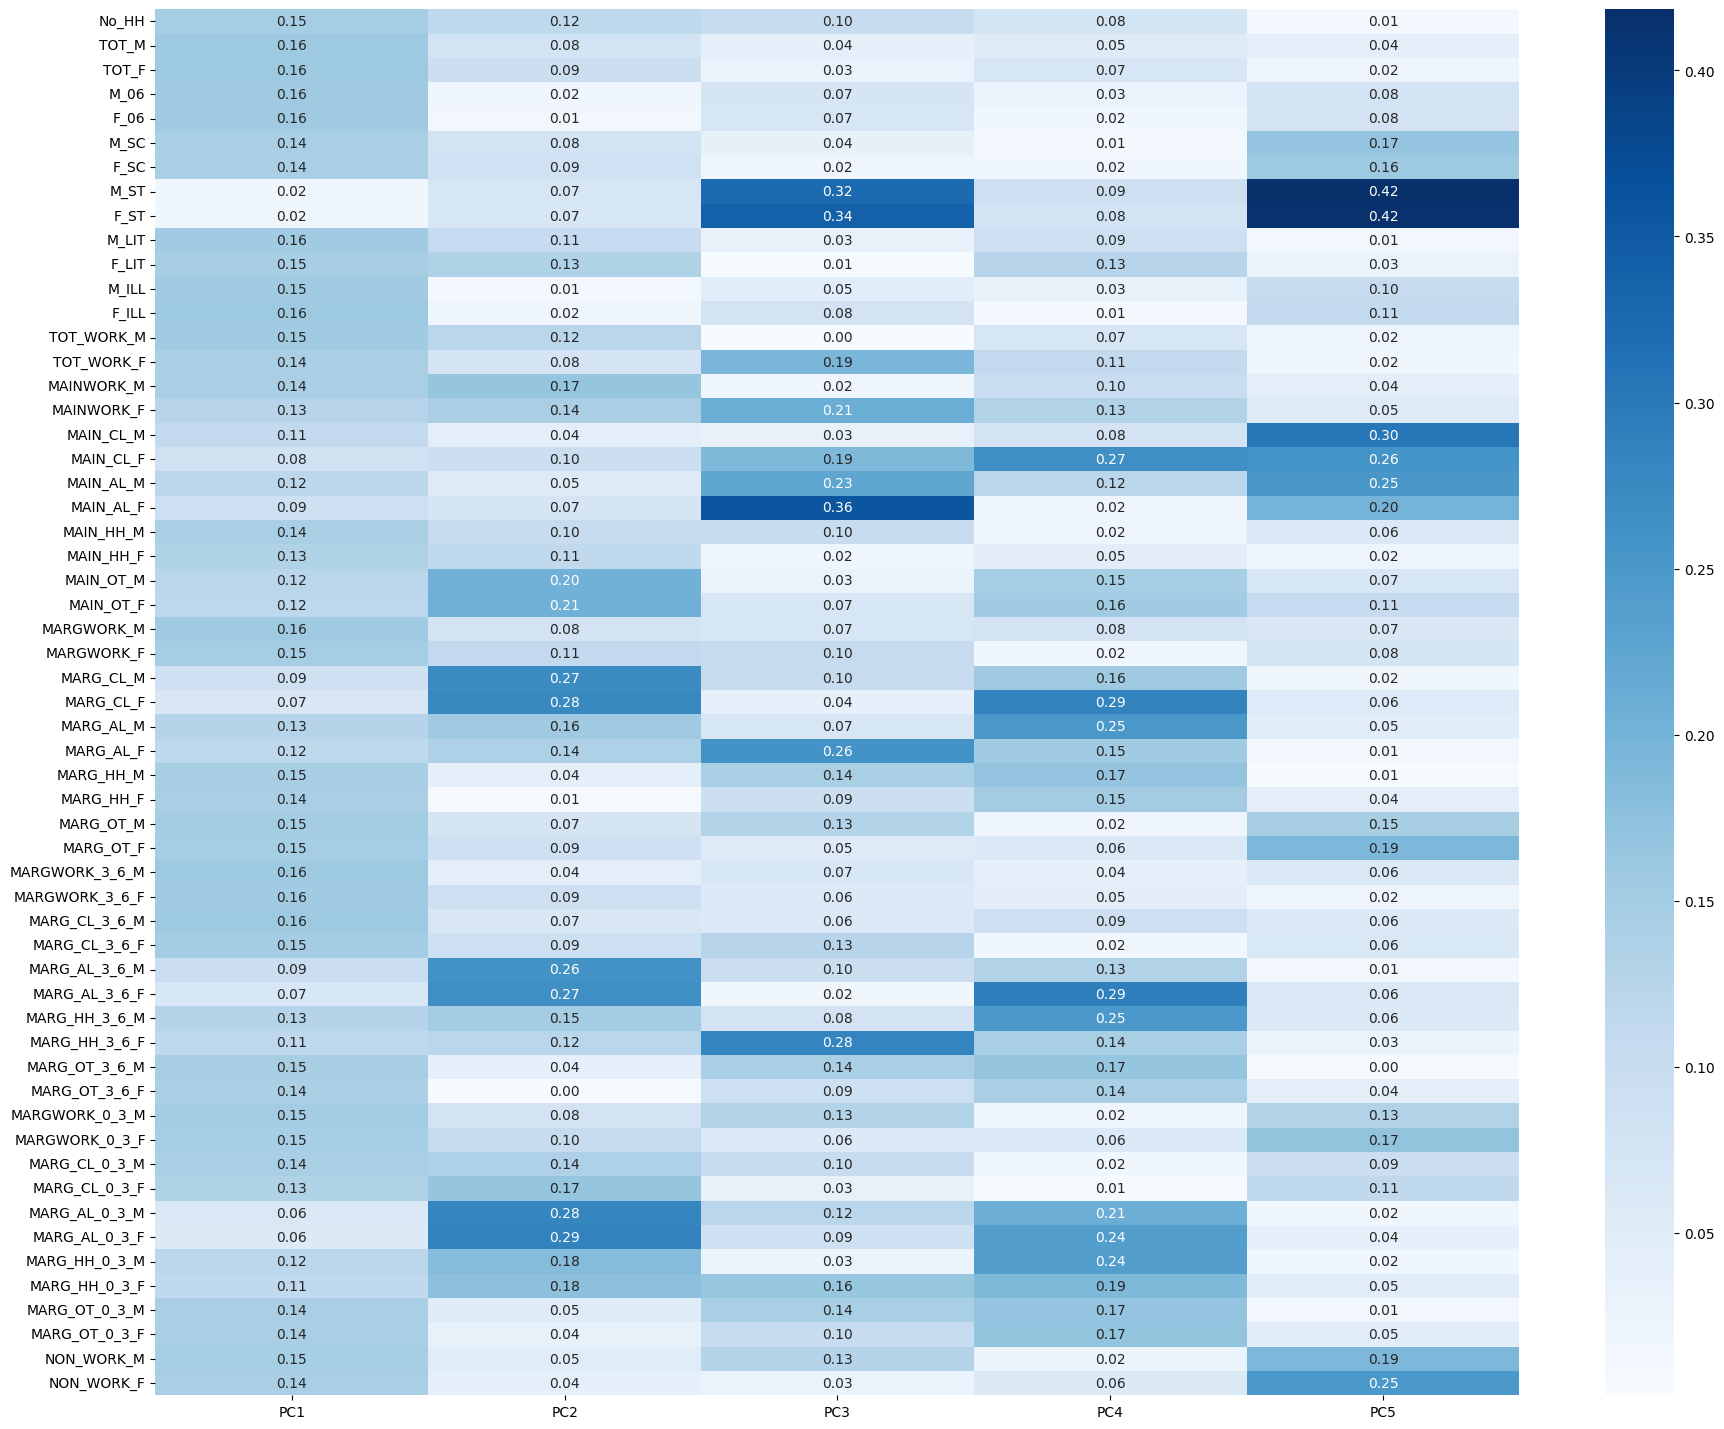

In [349]:
plt.figure(figsize=(22, 18))
heatmap = sns.heatmap(abs(df_selected), annot=True, cmap='Blues', fmt='.2f')

# Extract correlation values from the heatmap
correlation_values = df_selected.abs().unstack().sort_values(ascending=False)

# Print correlation values in descending order
print("Correlation values in descending order:")
for (var1, var2), value in correlation_values.items():
    print(f"{var1} - {var2}: {value:.2f}")

plt.show()


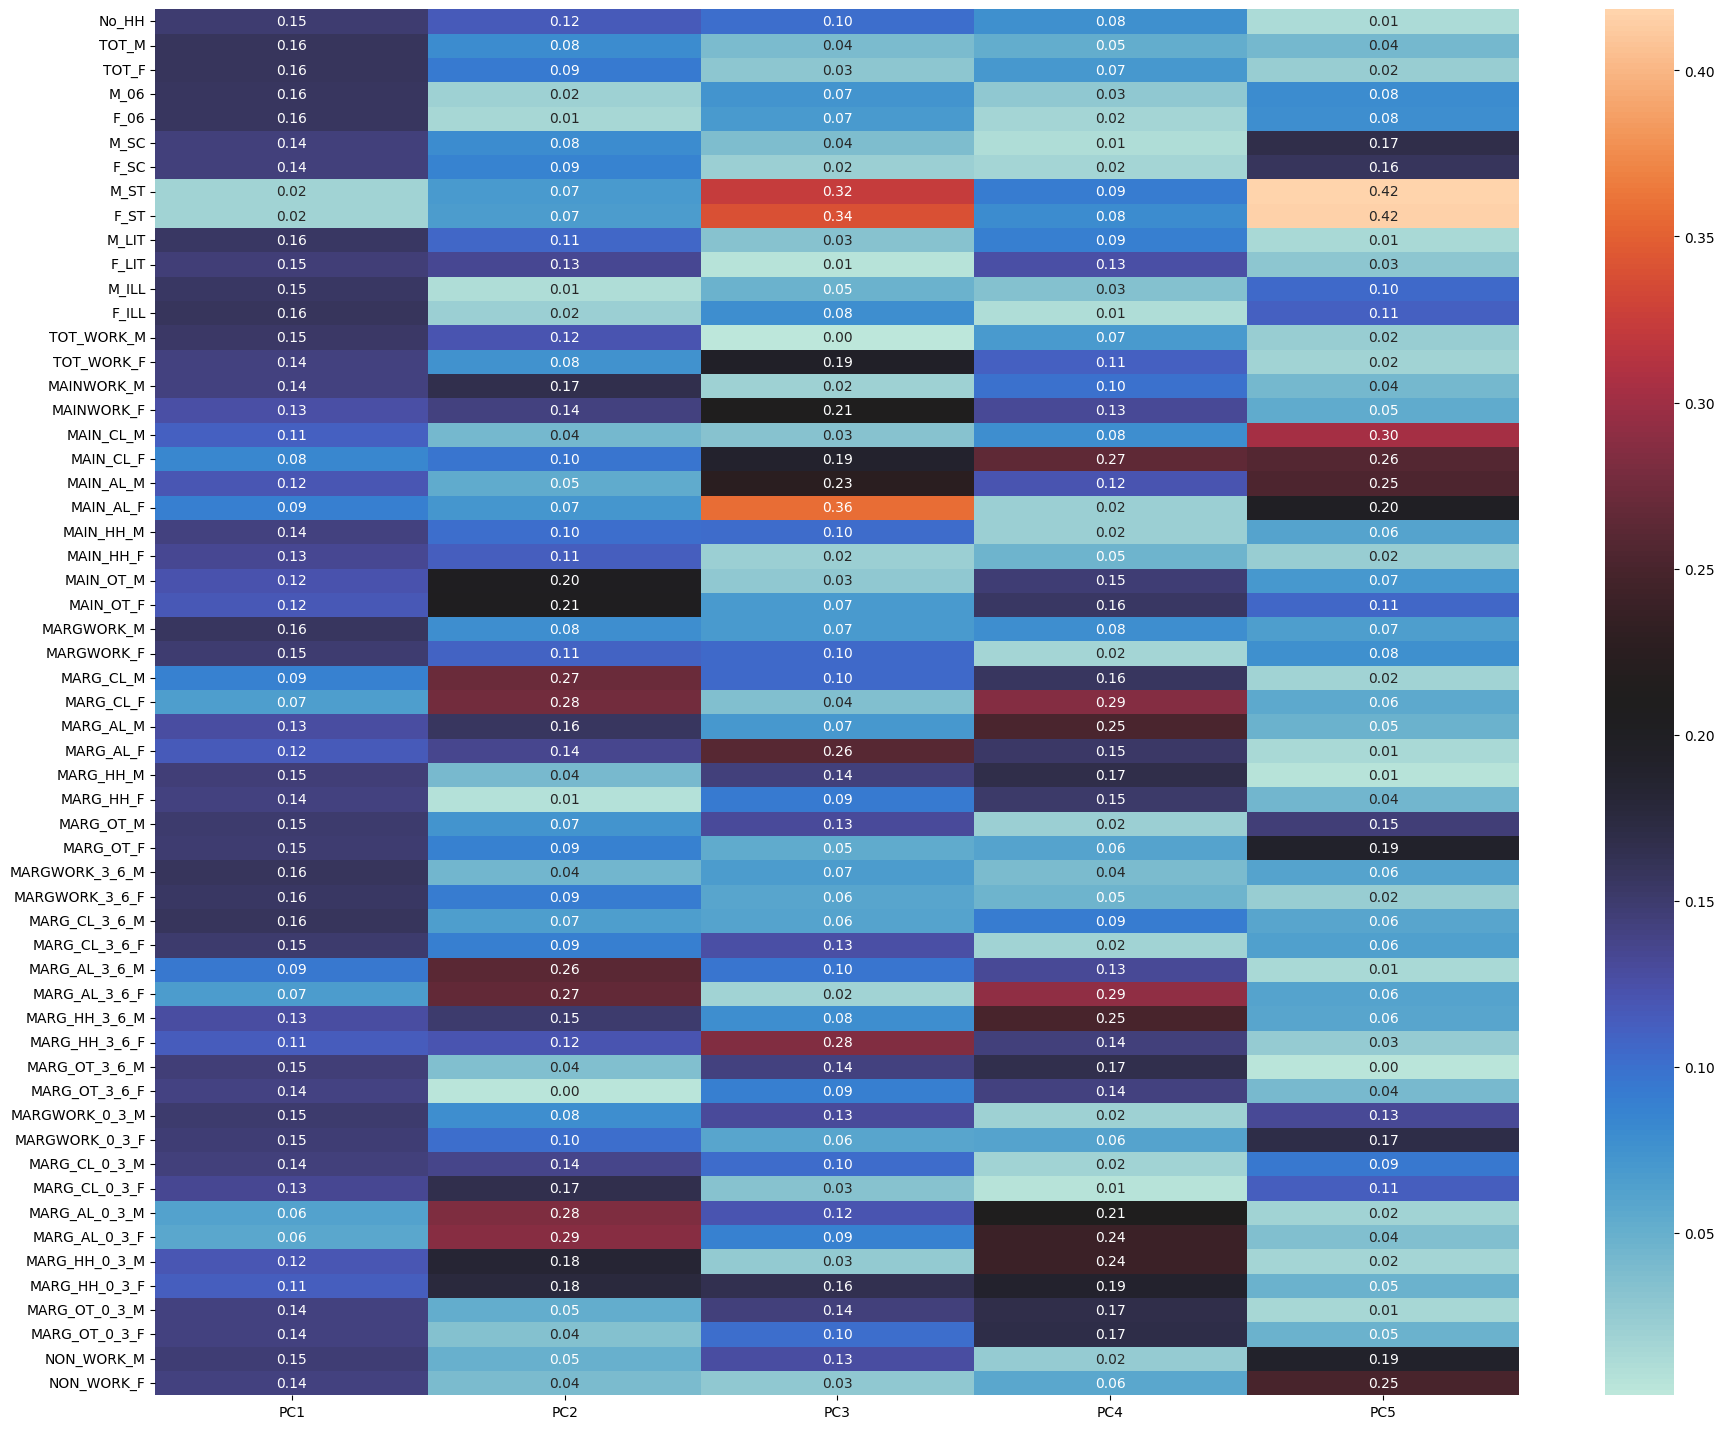

In [328]:
#Compare how the original features influence various PCs
plt.figure(figsize = (22,18))
sns.heatmap(abs(df_selected), annot = True, cmap = 'icefire',fmt = '.2f');

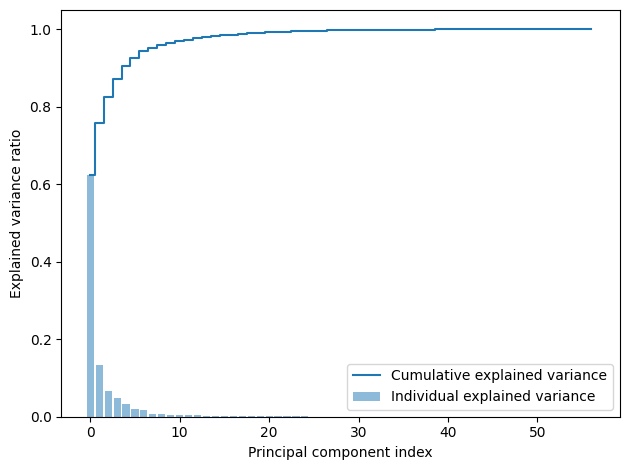

In [369]:
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

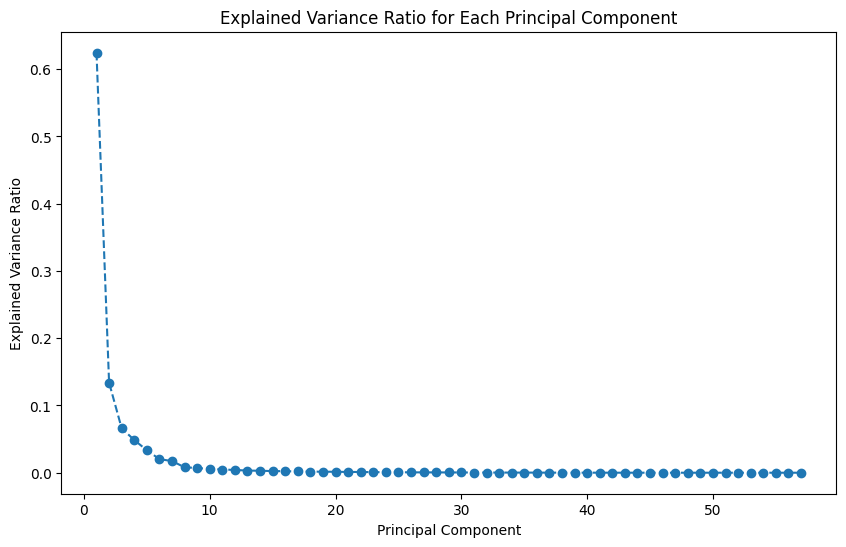

Principal Component 1 explains the most variance with an explained variance ratio of 0.62


In [370]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get the explained variance ratio for each PC
explained_variance_ratio = pca.explained_variance_ratio_
exp_var_pca = pca.explained_variance_ratio_

# Plot the explained variance ratio for each PC
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(exp_var_pca) + 1), exp_var_pca, marker='o', linestyle='--')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Identify the PC with the highest explained variance ratio
max_var_pc = exp_var_pca.argmax() + 1  # Add 1 because component numbering starts from 1

print(f"Principal Component {max_var_pc} explains the most variance with an explained variance ratio of {explained_variance_ratio[max_var_pc - 1]:.2f}")


In [371]:
df_selected

PC1       PC2       PC3       PC4       PC5
No_HH           0.149222 -0.115487  0.101528  0.076814 -0.012090
TOT_M           0.159169 -0.080239 -0.038662  0.052976 -0.042344
TOT_F           0.158209 -0.093718  0.028959  0.070022 -0.022927
M_06            0.156340 -0.020341 -0.074419  0.028520 -0.080339
F_06            0.156814 -0.014310 -0.068223  0.016398 -0.078326
M_SC            0.143350 -0.079667 -0.037619  0.010210 -0.167893
F_SC            0.143537 -0.087098  0.021350  0.016244 -0.158092
M_ST            0.018849  0.069101  0.323827  0.091143  0.418412
F_ST            0.017878  0.067316  0.338705  0.079554  0.415965
M_LIT           0.155152 -0.105986 -0.032107  0.089187 -0.014033
F_LIT           0.145450 -0.133234 -0.005133  0.125412  0.029084
M_ILL           0.154551 -0.009460 -0.047054 -0.034665 -0.104073
F_ILL           0.158283 -0.021793  0.079345 -0.010578 -0.110332
TOT_WORK_M      0.154076 -0.120912 -0.001116  0.069046 -0.023104
TOT_WORK_F      0.142530 -0.076003  0.194130  0.111057 -0.018931
MAINWORK_M      0.141932 -0.166700  0.019821  0.100188 -0.043225
MAINWORK_F      0.125732 -0.142250  0.209976  0.133013 -0.054674
MAIN_CL_M       0.111692  0.042552  0.033131  0.078851 -0.303376
MAIN_CL_F       0.083035  0.095893  0.188822  0.265022 -0.257925
MAIN_AL_M       0.119291 -0.053342  0.225831 -0.121379 -0.253131
MAIN_AL_F       0.090089 -0.072467  0.356566 -0.020989 -0.199220
MAIN_HH_M       0.141850 -0.101835 -0.102202 -0.021969 -0.060812
MAIN_HH_F       0.133880 -0.113257  0.021613 -0.045436 -0.023063
MAIN_OT_M       0.122762 -0.203602 -0.028144  0.147025  0.069907
MAIN_OT_F       0.116866 -0.205899  0.069034  0.155917  0.106774
MARGWORK_M      0.156656  0.079039 -0.068685 -0.078572  0.065812
MARGWORK_F      0.148695  0.108813  0.104957  0.015788  0.077624
MARG_CL_M       0.088163  0.271522 -0.104745  0.157104 -0.018005
MARG_CL_F       0.065160  0.275398 -0.036325  0.285024 -0.055152
MARG_AL_M       0.127278  0.156579  0.070434 -0.250594 -0.047200
MARG_AL_F       0.115888  0.135048  0.259987 -0.153798 -0.012643
MARG_HH_M       0.145366  0.040974 -0.144347 -0.167540  0.005575
MARG_HH_F       0.142302  0.006685 -0.093838 -0.151469  0.043616
MARG_OT_M       0.150877 -0.073440 -0.131415  0.021195  0.145109
MARG_OT_F       0.148018 -0.088361 -0.053883  0.059961  0.190756
MARGWORK_3_6_M  0.157908 -0.044044 -0.066877  0.039319 -0.059886
MARGWORK_3_6_F  0.155831 -0.092383 -0.058718  0.046130 -0.022476
MARG_CL_3_6_M   0.157640  0.066208 -0.060172 -0.091315  0.059078
MARG_CL_3_6_F   0.149501  0.089651  0.125792  0.018865  0.064349
MARG_AL_3_6_M   0.094785  0.261268 -0.096551  0.131591 -0.013887
MARG_AL_3_6_F   0.067158  0.266691 -0.018256  0.292845 -0.061019
MARG_HH_3_6_M   0.128184  0.149831  0.078194 -0.250337 -0.058665
MARG_HH_3_6_F   0.113959  0.120648  0.283235 -0.143045 -0.025386
MARG_OT_3_6_M   0.145108  0.036763 -0.142511 -0.166002  0.003315
MARG_OT_3_6_F   0.141029 -0.003685 -0.089356 -0.142599  0.041678
MARGWORK_0_3_M  0.150922 -0.077739 -0.130687  0.019887  0.132794
MARGWORK_0_3_F  0.147534 -0.101141 -0.058489  0.060087  0.170596
MARG_CL_0_3_M   0.142987  0.136839 -0.103565 -0.018223  0.094293
MARG_CL_0_3_F   0.133784  0.166416  0.033423  0.005954  0.112351
MARG_AL_0_3_M   0.062964  0.281881 -0.120293  0.208941 -0.018070
MARG_AL_0_3_F   0.056741  0.287541 -0.088097  0.240499 -0.036293
MARG_HH_0_3_M   0.119102  0.182341  0.026176 -0.240416  0.016981
MARG_HH_0_3_F   0.113044  0.177112  0.164774 -0.189408  0.047538
MARG_OT_0_3_M   0.142140  0.052925 -0.144419 -0.167554  0.014187
MARG_OT_0_3_F   0.141370  0.035109 -0.102175 -0.169020  0.047504
NON_WORK_M      0.147629 -0.049122 -0.126673  0.024036  0.191790
NON_WORK_F      0.142103 -0.039848 -0.028545  0.057402  0.249765

In [372]:
#and we need the original scaled features
df_zscore.iloc[0]

No_HH            -1.038986
TOT_M            -0.874837
TOT_F            -0.937027
M_06             -0.624685
F_06             -0.561282
M_SC             -1.080201
F_SC             -1.079963
M_ST             -0.510440
F_ST             -0.574198
M_LIT            -0.939617
F_LIT            -0.965904
M_ILL            -0.644588
F_ILL            -0.837035
TOT_WORK_M       -1.012439
TOT_WORK_F       -1.155832
MAINWORK_M       -1.066369
MAINWORK_F       -1.124355
MAIN_CL_M        -1.144964
MAIN_CL_F        -1.180238
MAIN_AL_M        -0.948406
MAIN_AL_F        -0.898818
MAIN_HH_M        -0.917053
MAIN_HH_F        -0.895765
MAIN_OT_M        -0.923768
MAIN_OT_F        -0.989318
MARGWORK_M       -0.570019
MARGWORK_F       -1.039881
MARG_CL_M        -0.347274
MARG_CL_F        -0.759467
MARG_AL_M        -0.331878
MARG_AL_F        -0.934181
MARG_HH_M        -0.465296
MARG_HH_F        -0.661238
MARG_OT_M        -0.665594
MARG_OT_F        -0.797562
MARGWORK_3_6_M   -0.731300
MARGWORK_3_6_F   -0.787295
M

In [373]:
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=5, random_state=123)
pca_final = pca.fit_transform(df_zscore)

In [374]:
#'pca_final_df' is my DataFrame
pca_final_df = pd.DataFrame(pca_final, columns=[f'PC{i}' for i in range(1, pca_final.shape[1] + 1)])
pca_final_df

PC1       PC2       PC3       PC4       PC5
0   -5.528161  0.430378 -1.473827 -1.278049  0.376358
1   -5.492016 -0.106110 -2.015641 -1.750168 -0.006857
2   -7.474643 -0.217194 -0.247428  0.006079  0.556282
3   -7.919737 -0.652311 -0.659220 -0.735550  0.272465
4   -5.175695  2.304059 -1.157327  1.060796  1.080249
..        ...       ...       ...       ...       ...
635 -7.946040 -1.302846 -0.819360 -0.871301 -0.101966
636 -7.244719 -1.396520 -0.719443 -0.895934 -0.062742
637 -7.886268 -1.003537 -0.909285 -1.238009  0.146031
638 -7.864260 -0.999338 -0.851569 -0.782561 -0.081681
639 -7.416226 -1.412143 -0.865921 -0.680528  0.096861

[640 rows x 5 columns]

In [375]:
#You can use the numpy library to calculate the first principal component of a linear equation.

import numpy as np

# inputs
x = pca_final_df["PC1"]
y = pca_final_df["PC2"]

# mean of inputs
x_mean = np.mean(x)
y_mean = np.mean(y)

# calculate the first principal component
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)

slope = numerator / denominator
intercept = y_mean - (slope * x_mean)

print("The first principal component is: y = {:.2f}x + {:.2f}".format(slope, intercept))

The first principal component is: y = 0.00x + -0.00


In [376]:
import pandas as pd
from sklearn.decomposition import PCA

# Fit PCA with the desired number of components
num_components = 5
pca = PCA(n_components=num_components)
pca.fit(df_zscore)  

# Get the coefficients for each principal component
coefficients_df = pd.DataFrame(pca.components_, columns=df_zscore.columns)

# Display the DataFrame with coefficients
print("Coefficients for each Principal Component:")
print(coefficients_df)

# Write linear equations for each principal component
for i in range(num_components):
    linear_equation = f'PC{i + 1} = '
    for j, (feature, coefficient) in enumerate(zip(df_zscore.columns, coefficients_df.iloc[i])):
        linear_equation += f'{coefficient:.4f} * {feature}'
        if j < len(df_zscore.columns) - 1:
            linear_equation += ' + '

    print(linear_equation)

Coefficients for each Principal Component:
      No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0  0.149222  0.159169  0.158209  0.156340  0.156814  0.143350  0.143537   
1 -0.115487 -0.080239 -0.093718 -0.020341 -0.014310 -0.079667 -0.087098   
2  0.101528 -0.038662  0.028959 -0.074419 -0.068223 -0.037619  0.021350   
3  0.076814  0.052976  0.070022  0.028520  0.016398  0.010210  0.016244   
4 -0.012090 -0.042344 -0.022927 -0.080339 -0.078326 -0.167893 -0.158092   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0  0.018849  0.017878  0.155152  ...       0.142987       0.133784   
1  0.069101  0.067316 -0.105986  ...       0.136839       0.166416   
2  0.323827  0.338705 -0.032107  ...      -0.103565       0.033423   
3  0.091143  0.079554  0.089187  ...      -0.018223       0.005954   
4  0.418412  0.415965 -0.014033  ...       0.094293       0.112351   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0    

In [377]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(df_zscore)

# Get the coefficients for the first principal component
coefficients_df = pd.DataFrame(pca.components_, columns=df_zscore.columns)

# Display the DataFrame with coefficients
print("Coefficients for the First Principal Component:")
print(coefficients_df)

# Write linear equation for the first principal component
linear_equation = f'PC1 = '
for j, (feature, coefficient) in enumerate(zip(df_zscore.columns, coefficients_df.iloc[0])):
    linear_equation += f'{coefficient:.4f} * {feature}'
    if j < len(df_zscore.columns) - 1:
        linear_equation += ' + '

print(linear_equation)


Coefficients for the First Principal Component:
      No_HH     TOT_M     TOT_F     M_06      F_06     M_SC      F_SC  \
0  0.149222  0.159169  0.158209  0.15634  0.156814  0.14335  0.143537   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0  0.018849  0.017878  0.155152  ...       0.142987       0.133784   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0       0.062964       0.056741       0.119102       0.113044        0.14214   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0        0.14137    0.147629    0.142103  

[1 rows x 57 columns]
PC1 = 0.1492 * No_HH + 0.1592 * TOT_M + 0.1582 * TOT_F + 0.1563 * M_06 + 0.1568 * F_06 + 0.1434 * M_SC + 0.1435 * F_SC + 0.0188 * M_ST + 0.0179 * F_ST + 0.1552 * M_LIT + 0.1454 * F_LIT + 0.1546 * M_ILL + 0.1583 * F_ILL + 0.1541 * TOT_WORK_M + 0.1425 * TOT_WORK_F + 0.1419 * MAINWORK_M + 0.1257 * MAINWORK_F + 0.1117 * MAIN_CL_M + 0.0830 * MAIN_CL_F + 0.1193 * MAIN_AL_M + 0.0901 * MAIN_AL_F + 0